# Part A - Application area review

Inspired by the "Algorithmic Trading – Machine Learning & Quant Strategies Course with Python" (https://youtu.be/9Y3yaoi9rUQ) by Freecodecamp which uses K-means clustering to form an investment portfolio, I have explored the clustering approach of DBSCAN instead of K-means clustering for a improved performance by not ignoring the outliers and overcoming all the disadvantages on K-means clustering (Spherical cluster assumption and equal size clusters).

## Forming an Investment Portfolio based on the daily returns of the stocks in S&P 500 financial markets.

#### Introduction:

There are many individuals in different industries who are interested in stocks as an investment of passive income. But traders and financial professionals who deal with stocks as their active income spends much more time on them and have worked on effective strategies for forming investment portfolios that can deliver superior returns while managing risk. Daily stock returns within the context of S&P 500 benchmark is a popular approach among professionals with their decades of experience and statistical analysis. But with the utilization of AI and machine learning tools, regular individuals can benefit the most from their investments.

### Historical Context and Conceptual Frameworks for Portfolio Formation:
To understand the significance of daily returns in portfolio formation, it is crucial to explore the historical context and conceptual frameworks that underpin this approach. Modern Portfolio Theory (MPT), introduced by Harry Markowitz in the 1950s, emphasizes the importance of diversification in constructing portfolios.

### Methodologies for Utilizing Daily Returns:
Various methodologies have been proposed for forming investment portfolios based on the daily returns of S&P 500 stocks. Researchers have employed statistical techniques, machine learning algorithms, and optimization models to identify optimal portfolios that maximize returns and minimize risk. Notable studies have introduced Bayesian approaches and equilibrium models to enhance the precision of portfolio construction.

### Factors Influencing Daily Returns:
Understanding the factors that influence daily returns is crucial for effective portfolio formation. Research has explored macroeconomic indicators, market sentiment, and company-specific variables as potential drivers of stock returns. Fama and French (1992) extended the traditional Capital Asset Pricing Model (CAPM) by incorporating size and value factors, providing additional insights into the multifaceted nature of stock returns.

### Conclusion:
This literature on forming investment portfolios based on the daily returns of S&P 500 stocks provides a comprehensive overview of diverse methodologies in performance evaluations with daily returns. While advancements in statistical methods, machine learning, and behavioral finance have enriched our understanding, ongoing research is essential for adapting strategies to evolving market conditions. 

### References

* Michaud, Richard. (2004). A Practical Framework for Portfolio Choice.
* Wen, Zhijian. (2023). Theoretical Analysis of Modern Portfolio Theory. BCP Business & Management. 47. 99-104. 10.54691/bcpbm.v47i.5177.
* Ioannidis, Evangelos & Sarikeisoglou, Iordanis & Angelidis, Georgios. (2023). Portfolio Construction: A Network Approach. Mathematics. 11. 4670. 10.3390/math11224670.
* Abalkhail, M. (no date). The Modern Portfolio Theory.
* Bade, Alexander & Frahm, Gabriel & Jaekel, Uwe. (2008). A general approach to Bayesian portfolio optimization. Mathematical Methods of Operations Research. 70. 337-356. 10.1007/s00186-008-0271-4.
* Floyd, J.E. (1972). Portfolio Equilibrium and the Theory of Capital Movements. International Mobility and Movement of Capital. NBER, 91–124. Available from https://www.nber.org/books-and-chapters/international-mobility-and-movement-capital/portfolio-equilibrium-and-theory-capital-movements.
* Mao, B. (2009) An empirical study of the fama and french three-factor model. ProQuest Dissertations Publishing.


# Part B - Compare and evaluate AI techniques

| Clustering Model | Pros | Cons | Conclusion |
|----------|----------|----------|----------|
| K-Means Clustering | * Efficient  <br> * Scalable | * Assumes clusters are spherical and equally sized | * Ignores outliers and should work well with known spherical cluster problems |
| DBSCAN Clustering ( Density Based Spatial Clustering of Applications with Noise Clustering ) | * Cluster shape can be arbitrary  <br> * Identifies noise points <br> * No need to pre define the number of clusters needed | * Sensitive to the minimum samples and epsilon (maximum distance between two points) | * Ideal for problems with arbitrary cluster shape |
| Artificial Neural Networks - Self-Organizing Maps (SOM) | * Different data types could be handle as input  <br> * Can detect outliers and noise <br> * Can learn complex non-linear relationship | * Sensitive to hyperparameter tuning <br> * Competitive learning approach requires significant training time <br> * High computaional intensity <br> * Requires a large dataset | * Ideal for problems with high complexity and non-linear relationships with large dataset  |

## K-Means Clustering

K-means clustering algorithm is a widely used clustering approach for simple problems with spherical clusters. It can work with numeric data types which makes it a go to approach in many statistical problems like this problem, Investing portfolio formation. It is expected to form clusters based on grouping of data points after assigning it to a specific cluster. These clusters tends to be equal size and sensitive to the number of clusters, initial centroids. But since K-means clustering is sensitive to outliers which is very common in real world, there's room for improvement in many of the problems which uses this approach.

## DBSCAN Clustering

DBSCAN is a robust clustering approach which can identifies outliers and independent of number of clusters that can be formed. It can identify clusters with arbitrary shapes assigning each point to a cluster, noise or a border points, then the expected output is formed. Cluster properties can be seen as varied sizes and grouped with similar density data points. It can be used to form a investment portfolio based on the historical data, as it can identifies the outliers and effectively group stocks with similar performance charceteristics as thjeir density.

## ANN - Self Organizing Maps

ANN is a popular option in many of the modern problems with promising results. It can take both numeric and categorical data as input data and expected to output a categorical grid which is mapped with imput data. There are many advantages in this approach like robust to outliers, can represent non-linear complex structures which often times hard to represent in traditional algorithms. But as disadvantages, it is highly sensitive to the learning rate, map size and neighborhood size of data points. Therefore, even it is possible to perform tasks like investment portfolio formation with ANN, random stock behavior in real world which may not repeat the same patterns seen in historical data points is a critical factor that could be a disadvantage in taking this approach.

# Part C - Implementation.

## a)
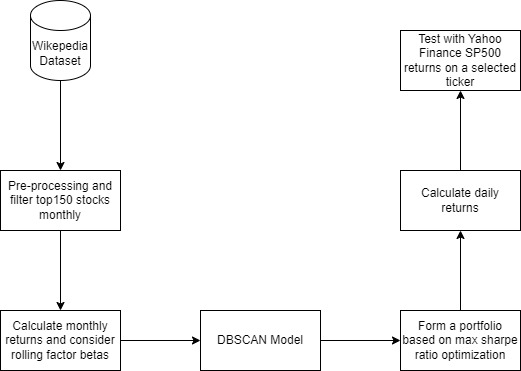

## b) Input

In this problem, we need a dataset of S&P 500 stocks in 2013 to 2023 with decision making triggers Garman-Klass Volatility, Relative Strength Index, Bollinger Bands, Average True Range (ATR) , Moving average convergence divergence (MACD) for each stock. Indicators from S&P 500 Wikepedia page and yfinance 

## c) Working Prototype

In [ ]:
#Installing all the required packages with pip

In [ ]:
%config IPCompleter.greedy=True

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install statsmodels

In [ ]:
pip install pandas-datareader

In [ ]:
pip install datetime

In [ ]:
pip install yfinance

In [ ]:
pip install scikit-learn

In [ ]:
pip install PyPortfolioOpt

In [ ]:
pip install pandas-ta

In [1]:
# Import required packages

from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings

# deal with default kernal warnings
warnings.filterwarnings('ignore')

### Dataset Pre-processing

In [2]:
# Downloading SP500 companies from Wikipedia

snp = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0] # extract the first table data

# Pre-cleaning
snp['Symbol'] = snp['Symbol'].str.replace('.','-')

symbolsList=snp['Symbol'].unique().tolist()

endDate = '2023-12-30'
startDate = pd.to_datetime(endDate)-pd.DateOffset(3650) #range of 10 years

df=yf.download(tickers=symbolsList,start=startDate,end=endDate).stack()
df.index.names=['date','ticker']
df.columns = df.columns.str.lower()
df

[*********************100%%**********************]  503 of 503 completed


adj close       close        high         low        open  \
date       ticker                                                               
2014-01-02 A        36.933746   40.207439   40.844063   40.164520   40.844063   
           AAL      23.907919   25.360001   25.820000   25.059999   25.070000   
           AAPL     17.318727   19.754642   19.893929   19.715000   19.845715   
           ABBV     34.508282   51.980000   52.330002   51.520000   52.119999   
           ABT      31.520874   38.230000   38.400002   38.000000   38.090000   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     197.369995  197.369995  198.009995  196.250000  196.679993   

                        volume  
date       ticker               
2014-01-02 A         2678848.0  
           AAL       8997900.0  
           AAPL    234684800.0  
           ABBV      4569100.0  
           ABT       4967500.0  
...                        ...  
2023-12-29 YUM       1196800.0  
           ZBH        849600.0  
           ZBRA       251300.0  
           ZION      1420600.0  
           ZTS       1007200.0  

[1234753 rows x 6 columns]

#### Calculating each stock decision makers

* Garman-Klass Volatility (refferenced : https://pyquantnews.com/how-to-compute-volatility-6-ways/)
* Relative Strength Index (RSI)
* Bollinger Bands
* ATR
* MACD
* Dollar Volume

In [3]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
                                                          
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                          
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df

adj close       close        high         low        open  \
date       ticker                                                               
2014-01-02 A        36.933746   40.207439   40.844063   40.164520   40.844063   
           AAL      23.907919   25.360001   25.820000   25.059999   25.070000   
           AAPL     17.318727   19.754642   19.893929   19.715000   19.845715   
           ABBV     34.508282   51.980000   52.330002   51.520000   52.119999   
           ABT      31.520874   38.230000   38.400002   38.000000   38.090000   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     197.369995  197.369995  198.009995  196.250000  196.679993   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2014-01-02 A         2678848.0         -0.003771        NaN       NaN   
           AAL       8997900.0         -0.000424        NaN       NaN   
           AAPL    234684800.0         -0.007125        NaN       NaN   
           ABBV      4569100.0         -0.065561        NaN       NaN   
           ABT       4967500.0         -0.013788        NaN       NaN   
...                        ...               ...        ...       ...   
2023-12-29 YUM       1196800.0          0.000030  59.338371  4.824633   
           ZBH        849600.0          0.000044  68.767246  4.753563   
           ZBRA       251300.0          0.000073  67.914673  5.415905   
           ZION      1420600.0          0.000102  62.879829  3.611585   
           ZTS       1007200.0          0.000035  66.791335  5.186448   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2014-01-02 A            NaN       NaN       NaN       NaN      98.939893  
           AAL          NaN       NaN       NaN       NaN     215.121064  
           AAPL         NaN       NaN       NaN       NaN    4064.442098  
           ABBV         NaN       NaN       NaN       NaN     157.671790  
           ABT          NaN       NaN       NaN       NaN     156.579942  
...                     ...       ...       ...       ...            ...  
2023-12-29 YUM     4.862793  4.900952  0.100551  0.893189     156.373892  
           ZBH     4.784470  4.815377 -0.907728  1.063465     103.396317  
           ZBRA    5.546306  5.676707  0.079474  1.761343      68.687826  
           ZION    3.749483  3.887381  0.440494  2.339135      62.321720  
           ZTS     5.259449  5.332449  0.649087  2.432946     198.791059  

[1234753 rows x 14 columns]

#### Aggregate to monthly level and filter top 150 most liquid stocks for each month.

* To reduce training time and experiment with decision makers, we convert the business-daily data to month-end frequency.

In [4]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2014-02-28 A          196.048285   37.406845         -0.002180  47.680282   
           AAL        344.713845   34.815437         -0.000204  74.730900   
           AAPL      5120.148518   16.575417         -0.006428  47.521566   
           ABBV       211.700370   34.065632         -0.061529  54.493498   
           ABT        277.203462   32.982243         -0.012889  65.588380   
...                          ...         ...               ...        ...   
2023-12-31 YUM        207.539266  130.660004          0.000030  59.338371   
           ZBH        207.682671  121.699997          0.000044  68.767246   
           ZBRA        98.037275  273.329987          0.000073  67.914673   
           ZION       102.724363   43.869999          0.000102  62.879829   
           ZTS        335.154638  197.369995          0.000035  66.791335   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2014-02-28 A       3.607834  3.657596  3.707358 -0.809043 -0.382163  
           AAL     3.472771  3.532904  3.593037 -0.455056  1.973198  
           AAPL    2.812615  2.863379  2.914143 -0.958095 -0.319739  
           ABBV    3.486889  3.538988  3.591087 -1.138647 -0.062612  
           ABT     3.421168  3.484115  3.547062 -1.000502  0.084611  
...                     ...       ...       ...       ...       ...  
2023-12-31 YUM     4.824633  4.862793  4.900952  0.100551  0.893189  
           ZBH     4.753563  4.784470  4.815377 -0.907728  1.063465  
           ZBRA    5.415905  5.546306  5.676707  0.079474  1.761343  
           ZION    3.611585  3.749483  3.887381  0.440494  2.339135  
           ZTS     5.186448  5.259449  5.332449  0.649087  2.432946  

[58397 rows x 9 columns]

In [5]:
# Calculate 5-year rolling average of dollar volume for each stocks before filtering.

data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2015-01-31 AAL      46.503475         -0.002439  46.564211  3.842664   
           AAPL     26.218689         -0.005330  58.234332  3.188117   
           ABBV     41.669476         -0.060572  40.183942  3.759222   
           ABT      37.930992         -0.012268  52.170418  3.631777   
           ACN      72.380272         -0.009980  41.017314  4.302391   
...                       ...               ...        ...       ...   
2023-12-31 VRTX    406.890015          0.000028  65.899356  5.817492   
           VZ       37.700001          0.000041  57.985190  3.632663   
           WFC      49.220001          0.000025  67.347850  3.800094   
           WMT     157.649994          0.000017  52.372668  5.018094   
           XOM      99.980003          0.000041  42.607132  4.594084   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2015-01-31 AAL     3.922186  4.001708  2.725817  0.550069  
           AAPL    3.248364  3.308612 -0.656563 -0.119570  
           ABBV    3.806656  3.854090 -0.289178 -0.657113  
           ABT     3.654941  3.678105 -0.709260 -0.241521  
           ACN     4.341690  4.380988 -0.814961 -0.350506  
...                     ...       ...       ...       ...  
2023-12-31 VRTX    5.953002  6.088512  1.283566  3.405578  
           VZ      3.657159  3.681654 -1.135020  0.516432  
           WFC     3.887869  3.975643 -0.530647  2.066003  
           WMT     5.045321  5.072549  0.208894 -0.219181  
           XOM     4.622677  4.651270  0.145893 -0.673109  

[16092 rows x 8 columns]

#### Calculate Monthly Returns for different time horizons as features.

* To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.

In [6]:
# Calculate Monthly Returns for different time horizons as features. To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.

def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-01-31 AAL      37.260624          0.002147  42.958616  3.618182   
           AAPL     22.154411         -0.001265  41.477736  3.095448   
           ABBV     39.268002         -0.035988  45.787359  3.650394   
           ABT      32.788803         -0.004372  35.617570  3.508551   
           ACN      92.867653         -0.004168  54.939463  4.462048   
...                       ...               ...        ...       ...   
2023-12-31 VRTX    406.890015          0.000028  65.899356  5.817492   
           VZ       37.700001          0.000041  57.985190  3.632663   
           WFC      49.220001          0.000025  67.347850  3.800094   
           WMT     157.649994          0.000017  52.372668  5.018094   
           XOM      99.980003          0.000041  42.607132  4.594084   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2016-01-31 AAL     3.670850  3.723517  1.613562 -0.948405  -0.079339   
           AAPL    3.155693  3.215937 -0.658327 -0.667278  -0.075242   
           ABBV    3.719231  3.788067  0.335171 -0.228304  -0.063528   
           ABT     3.587802  3.667053 -0.285599 -1.274955  -0.132877   
           ACN     4.500503  4.538959 -0.529535 -0.285503   0.009952   
...                     ...       ...       ...       ...        ...   
2023-12-31 VRTX    5.953002  6.088512  1.283566  3.405578   0.146783   
           VZ      3.657159  3.681654 -1.135020  0.516432  -0.016436   
           WFC     3.887869  3.975643 -0.530647  2.066003   0.103835   
           WMT     5.045321  5.072549  0.208894 -0.219181   0.016350   
           XOM     4.622677  4.651270  0.145893 -0.673109  -0.026864   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2016-01-31 AAL     -0.027898  -0.054446  -0.003923  -0.023002   -0.018296  
           AAPL    -0.092904  -0.064753  -0.034599  -0.026135   -0.013938  
           ABBV    -0.023257  -0.023342  -0.035618  -0.015063   -0.004934  
           ABT     -0.079171  -0.052658  -0.043270  -0.020585   -0.012067  
           ACN     -0.007865  -0.005189   0.005680   0.015784    0.020987  
...                      ...        ...        ...        ...         ...  
2023-12-31 VRTX     0.060030   0.053758   0.024490   0.028824    0.028985  
           VZ       0.035933   0.058562   0.008786   0.002693    0.002233  
           WFC      0.117430   0.067168   0.026895   0.033852    0.017357  
           WMT     -0.015960  -0.003544   0.001708   0.008697    0.010148  
           XOM     -0.023690  -0.049736  -0.008782  -0.007363   -0.005374  

[13795 rows x 14 columns]

Download Fama-French Factors and Calculate Rolling Factor Betas.

* We will introduce the Fama French data to estimate the exposure of assets to common risk factors using linear regression.

* The five Fama French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

* We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [7]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'date'

factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2016-01-31 AAL    -0.0577 -0.0347  0.0209  0.0282  0.0308  -0.079339
           AAPL   -0.0577 -0.0347  0.0209  0.0282  0.0308  -0.075242
           ABBV   -0.0577 -0.0347  0.0209  0.0282  0.0308  -0.063528
           ABT    -0.0577 -0.0347  0.0209  0.0282  0.0308  -0.132877
           ACN    -0.0577 -0.0347  0.0209  0.0282  0.0308   0.009952
...                   ...     ...     ...     ...     ...        ...
2023-11-30 VRTX    0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.020160
           VZ      0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.091090
           WFC     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.131192
           WMT     0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.047243
           XOM     0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.020506

[13649 rows x 6 columns]

In [8]:
# Filter out stocks with less than 10 months of data

observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2016-01-31 AAL    -0.0577 -0.0347  0.0209  0.0282  0.0308  -0.079339
           AAPL   -0.0577 -0.0347  0.0209  0.0282  0.0308  -0.075242
           ABBV   -0.0577 -0.0347  0.0209  0.0282  0.0308  -0.063528
           ABT    -0.0577 -0.0347  0.0209  0.0282  0.0308  -0.132877
           ACN    -0.0577 -0.0347  0.0209  0.0282  0.0308   0.009952
...                   ...     ...     ...     ...     ...        ...
2023-11-30 VRTX    0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.020160
           VZ      0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.091090
           WFC     0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.131192
           WMT     0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.047243
           XOM     0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.020506

[13611 rows x 6 columns]

In [9]:
# Calculate Rolling Factor Betas

betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2016-01-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-11-30 VRTX    0.379605 -0.317302 -0.453101  0.337717  0.883738
           VZ      0.444382 -0.662921  0.516936  0.210190 -0.205776
           WFC     1.037897  0.401002  2.011853 -0.363960 -1.477538
           WMT     0.497270  0.081961 -0.730838  0.577494  0.752875
           XOM     0.718992 -0.217547  1.202773  0.224210  0.166030

[13611 rows x 5 columns]

In [10]:
# Join the rolling factors data to the main features dataframe

factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2016-01-31 AAL             0.002147  42.958616  3.618182  3.670850  3.723517   
           AAPL           -0.001265  41.477736  3.095448  3.155693  3.215937   
           ABBV           -0.035988  45.787359  3.650394  3.719231  3.788067   
           ABT            -0.004372  35.617570  3.508551  3.587802  3.667053   
           ACN            -0.004168  54.939463  4.462048  4.500503  4.538959   
...                             ...        ...       ...       ...       ...   
2023-12-31 VRTX            0.000028  65.899356  5.817492  5.953002  6.088512   
           VZ              0.000041  57.985190  3.632663  3.657159  3.681654   
           WFC             0.000025  67.347850  3.800094  3.887869  3.975643   
           WMT             0.000017  52.372668  5.018094  5.045321  5.072549   
           XOM             0.000041  42.607132  4.594084  4.622677  4.651270   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2016-01-31 AAL     1.613562 -0.948405  -0.079339  -0.027898  -0.054446   
           AAPL   -0.658327 -0.667278  -0.075242  -0.092904  -0.064753   
           ABBV    0.335171 -0.228304  -0.063528  -0.023257  -0.023342   
           ABT    -0.285599 -1.274955  -0.132877  -0.079171  -0.052658   
           ACN    -0.529535 -0.285503   0.009952  -0.007865  -0.005189   
...                     ...       ...        ...        ...        ...   
2023-12-31 VRTX    1.283566  3.405578   0.146783   0.060030   0.053758   
           VZ     -1.135020  0.516432  -0.016436   0.035933   0.058562   
           WFC    -0.530647  2.066003   0.103835   0.117430   0.067168   
           WMT     0.208894 -0.219181   0.016350  -0.015960  -0.003544   
           XOM     0.145893 -0.673109  -0.026864  -0.023690  -0.049736   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2016-01-31 AAL     -0.003923  -0.023002   -0.018296  1.331404  1.044413   
           AAPL    -0.034599  -0.026135   -0.013938  1.061826 -0.185113   
           ABBV    -0.035618  -0.015063   -0.004934  0.761865  0.238006   
           ABT     -0.043270  -0.020585   -0.012067  0.940744 -0.192213   
           ACN      0.005680   0.015784    0.020987  1.150727 -0.153362   
...                      ...        ...         ...       ...       ...   
2023-12-31 VRTX     0.024490   0.028824    0.028985  0.853586  0.067360   
           VZ       0.008786   0.002693    0.002233  0.619767 -0.369408   
           WFC      0.026895   0.033852    0.017357  1.217610 -0.146232   
           WMT      0.001708   0.008697    0.010148  0.784761 -0.512391   
           XOM     -0.008782  -0.007363   -0.005374  1.124940  0.279279   

                        HML       RMW       CMA  
date       ticker                                
2016-01-31 AAL     0.701816  0.797686  0.218999  
           AAPL   -0.510696  0.589382 -0.458788  
           ABBV    0.087477 -0.210345 -0.108035  
           ABT    -0.545893  0.081789  0.738570  
           ACN    -0.253797  0.173905 -0.016584  
...                     ...       ...       ...  
2023-12-31 VRTX   -1.342802 -0.083967  0.949365  
           VZ     -0.053373  0.367183  0.982445  
           WFC     1.267341 -0.671951 -0.188646  
           WMT    -0.203245  0.608837  0.630077  
           XOM     0.336060 -0.439975  0.910753  

[13564 rows x 18 columns]

### K-distance graph to find the eps

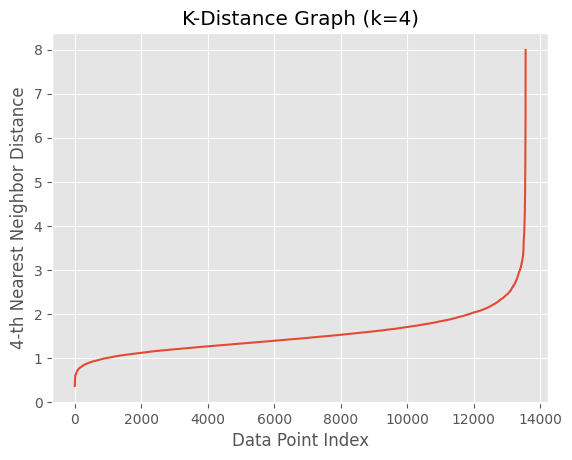

In [20]:
# To find the optimum eps value

from sklearn.neighbors import NearestNeighbors

# number of neighbors for the k distance graph
k_value=4

# Compute the distances to the k-th nearest neighbor for each data point

neighbors = NearestNeighbors(n_neighbors=k_value + 1)  # k + 1 is used to exclude the point itself
neighbors_fit = neighbors.fit(data)
distances, _ = neighbors_fit.kneighbors(data)

# Sort distances and plot the k-distance graph
sorted_distances = np.sort(distances[:, k_value - 1])

# Plotting the k-distance graph
plt.plot(np.arange(1, len(sorted_distances) + 1), sorted_distances)
plt.xlabel('Data Point Index')
plt.ylabel(f'{k_value}-th Nearest Neighbor Distance')
plt.title(f'K-Distance Graph (k={k_value})')
plt.show()

### Applying the clustering algorithm

In [12]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

#data = data.drop('cluster', axis=1)

def get_clusters(df):
    # Adjust the epsilon and min_samples parameters based on your data
    dbscan = DBSCAN(eps=2.4, min_samples=8)
    df['cluster'] = dbscan.fit_predict(df)
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2016-01-31 AAL             0.002147  42.958616  3.618182  3.670850  3.723517   
           AAPL           -0.001265  41.477736  3.095448  3.155693  3.215937   
           ABBV           -0.035988  45.787359  3.650394  3.719231  3.788067   
           ABT            -0.004372  35.617570  3.508551  3.587802  3.667053   
           ACN            -0.004168  54.939463  4.462048  4.500503  4.538959   
...                             ...        ...       ...       ...       ...   
2023-12-31 VRTX            0.000028  65.899356  5.817492  5.953002  6.088512   
           VZ              0.000041  57.985190  3.632663  3.657159  3.681654   
           WFC             0.000025  67.347850  3.800094  3.887869  3.975643   
           WMT             0.000017  52.372668  5.018094  5.045321  5.072549   
           XOM             0.000041  42.607132  4.594084  4.622677  4.651270   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2016-01-31 AAL     1.613562 -0.948405  -0.079339  -0.027898  -0.054446   
           AAPL   -0.658327 -0.667278  -0.075242  -0.092904  -0.064753   
           ABBV    0.335171 -0.228304  -0.063528  -0.023257  -0.023342   
           ABT    -0.285599 -1.274955  -0.132877  -0.079171  -0.052658   
           ACN    -0.529535 -0.285503   0.009952  -0.007865  -0.005189   
...                     ...       ...        ...        ...        ...   
2023-12-31 VRTX    1.283566  3.405578   0.146783   0.060030   0.053758   
           VZ     -1.135020  0.516432  -0.016436   0.035933   0.058562   
           WFC    -0.530647  2.066003   0.103835   0.117430   0.067168   
           WMT     0.208894 -0.219181   0.016350  -0.015960  -0.003544   
           XOM     0.145893 -0.673109  -0.026864  -0.023690  -0.049736   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2016-01-31 AAL     -0.003923  -0.023002   -0.018296  1.331404  1.044413   
           AAPL    -0.034599  -0.026135   -0.013938  1.061826 -0.185113   
           ABBV    -0.035618  -0.015063   -0.004934  0.761865  0.238006   
           ABT     -0.043270  -0.020585   -0.012067  0.940744 -0.192213   
           ACN      0.005680   0.015784    0.020987  1.150727 -0.153362   
...                      ...        ...         ...       ...       ...   
2023-12-31 VRTX     0.024490   0.028824    0.028985  0.853586  0.067360   
           VZ       0.008786   0.002693    0.002233  0.619767 -0.369408   
           WFC      0.026895   0.033852    0.017357  1.217610 -0.146232   
           WMT      0.001708   0.008697    0.010148  0.784761 -0.512391   
           XOM     -0.008782  -0.007363   -0.005374  1.124940  0.279279   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2016-01-31 AAL     0.701816  0.797686  0.218999       -1  
           AAPL   -0.510696  0.589382 -0.458788        0  
           ABBV    0.087477 -0.210345 -0.108035        1  
           ABT    -0.545893  0.081789  0.738570       -1  
           ACN    -0.253797  0.173905 -0.016584        2  
...                     ...       ...       ...      ...  
2023-12-31 VRTX   -1.342802 -0.083967  0.949365        0  
           VZ     -0.053373  0.367183  0.982445        1  
           WFC     1.267341 -0.671951 -0.188646       -1  
           WMT    -0.203245  0.608837  0.630077       -1  
           XOM     0.336060 -0.439975  0.910753       -1  

[13564 rows x 19 columns]

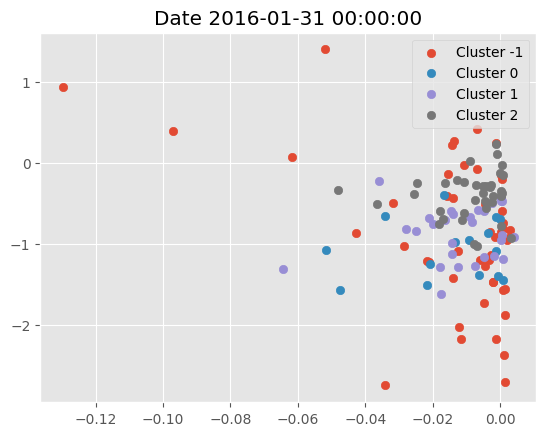

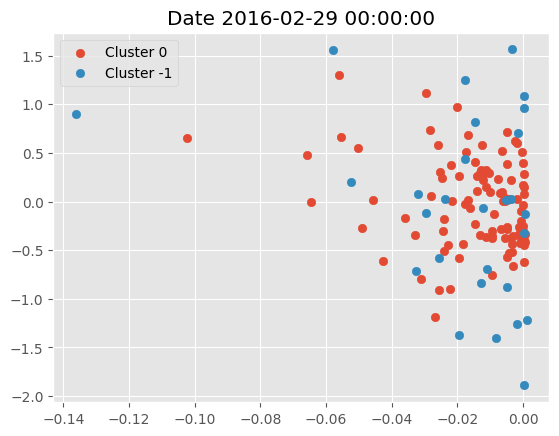

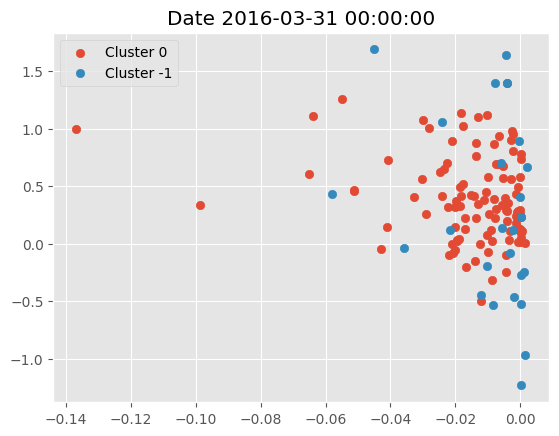

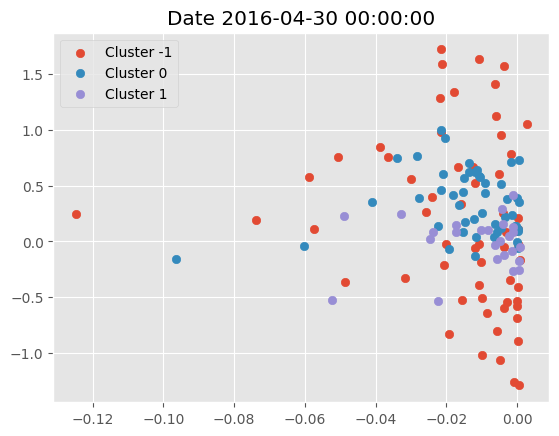

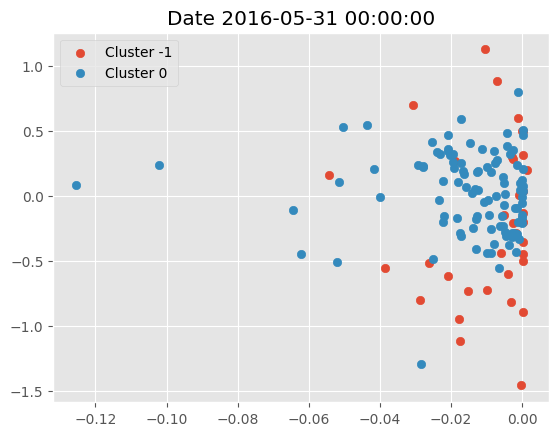

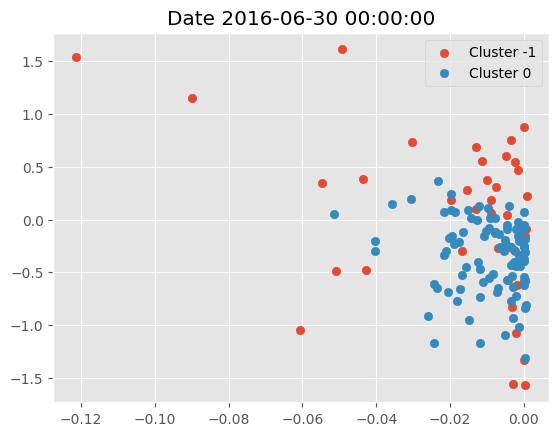

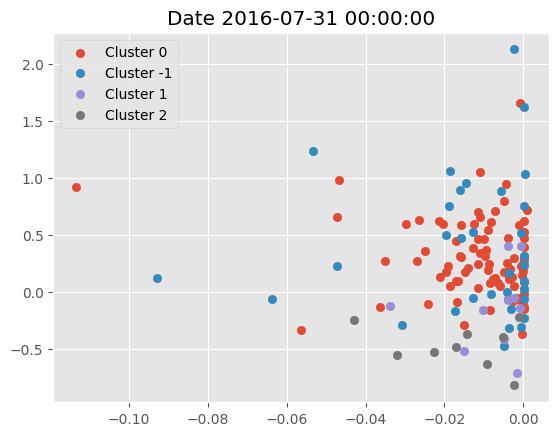

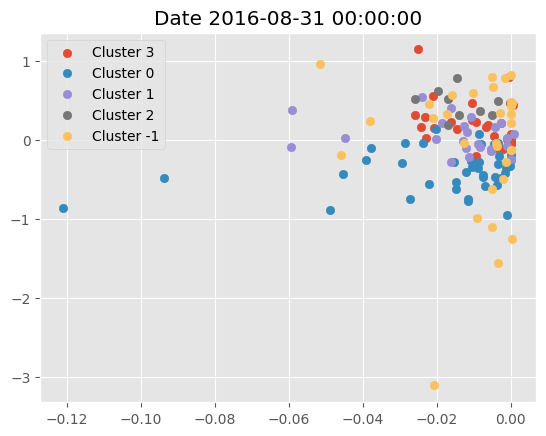

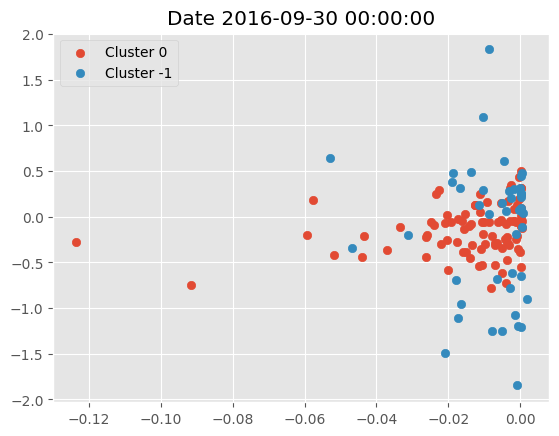

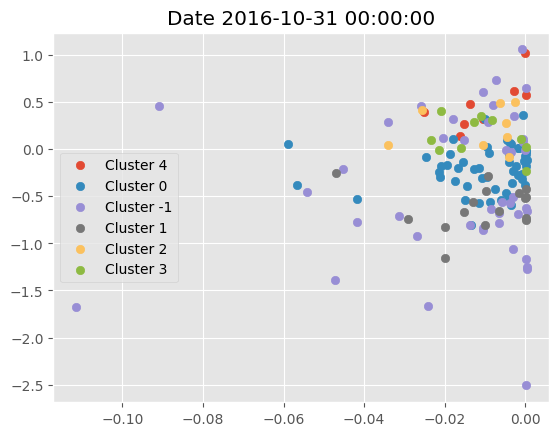

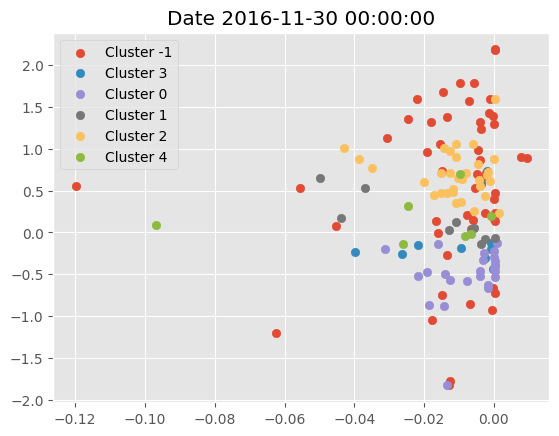

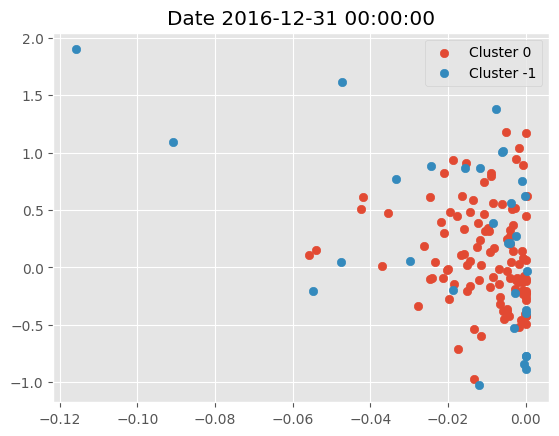

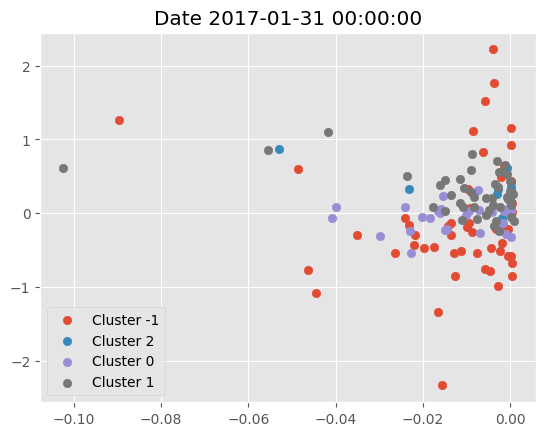

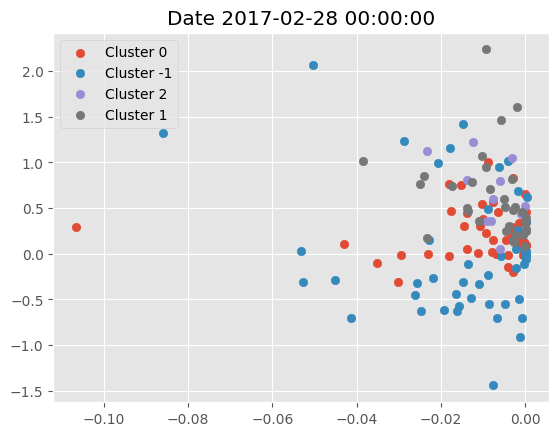

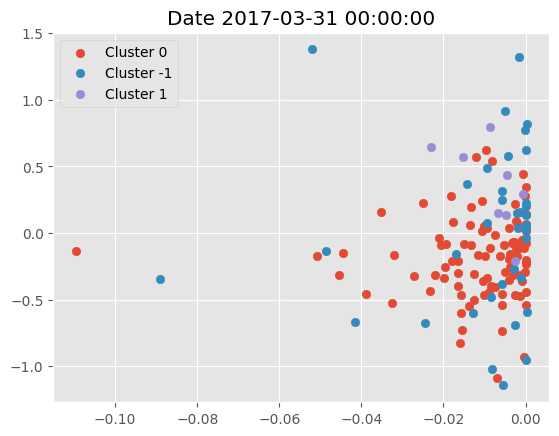

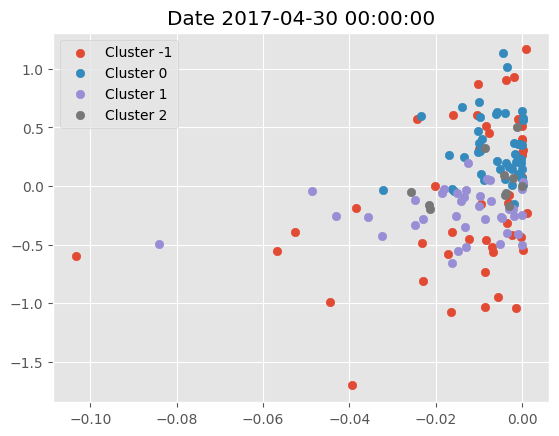

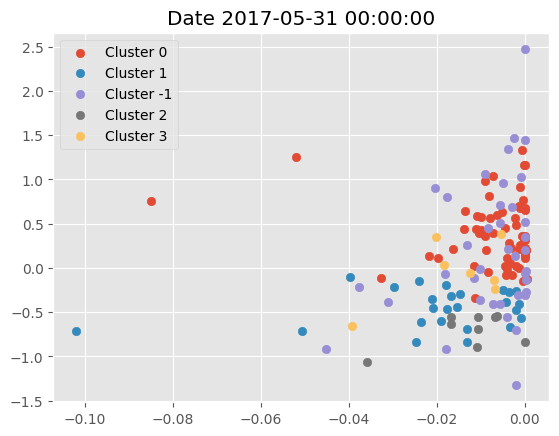

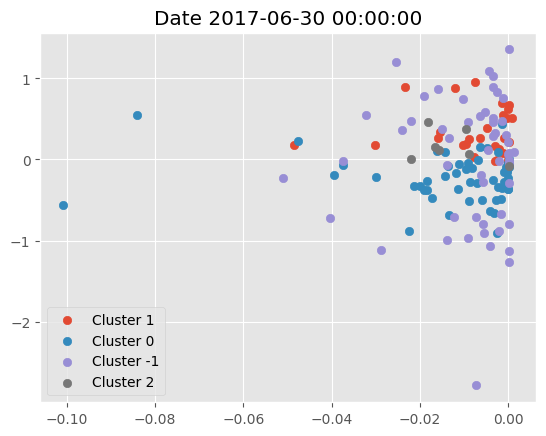

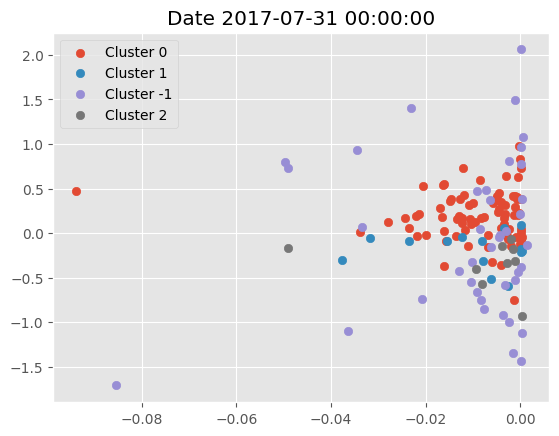

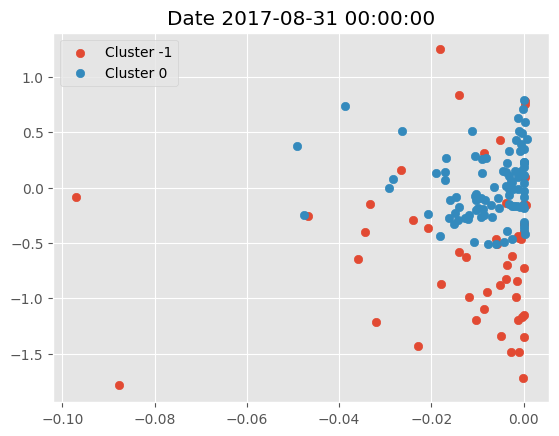

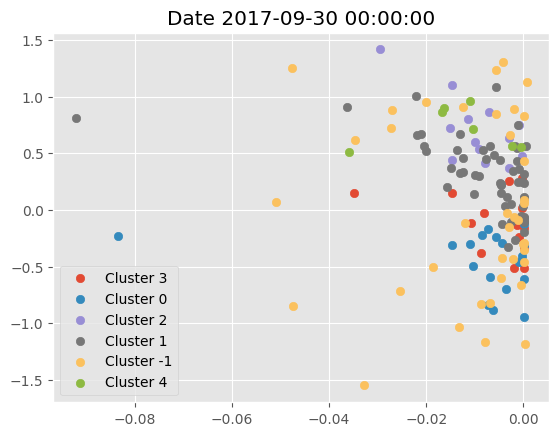

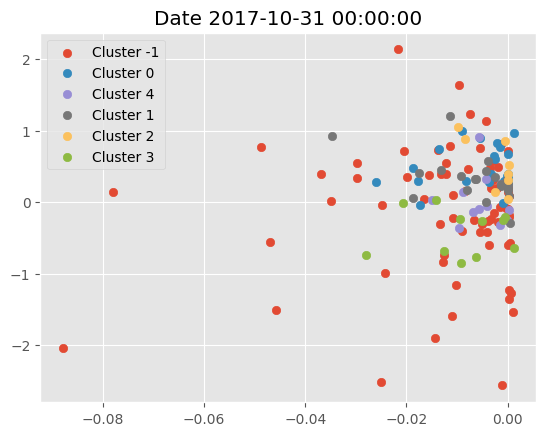

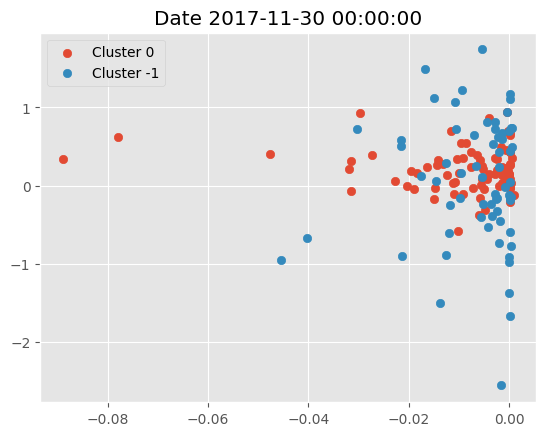

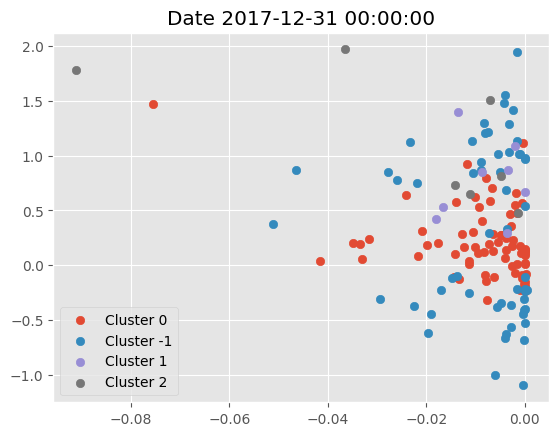

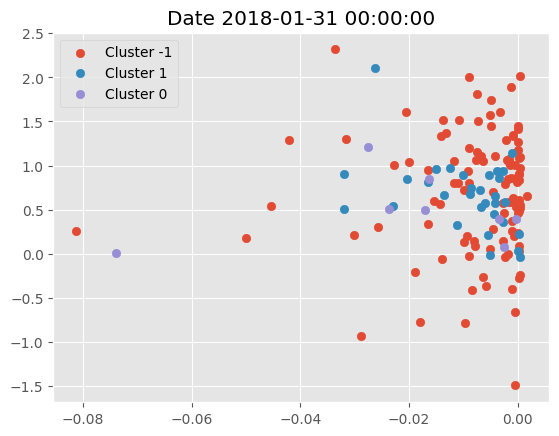

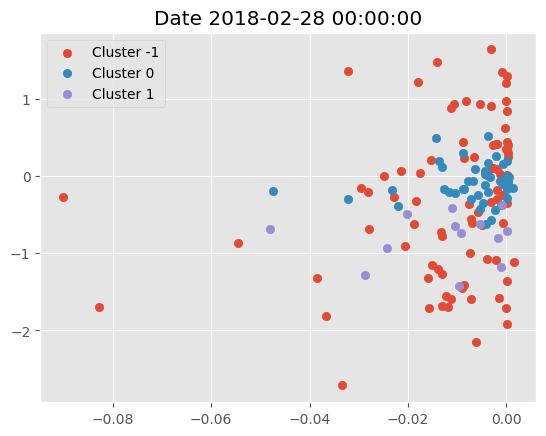

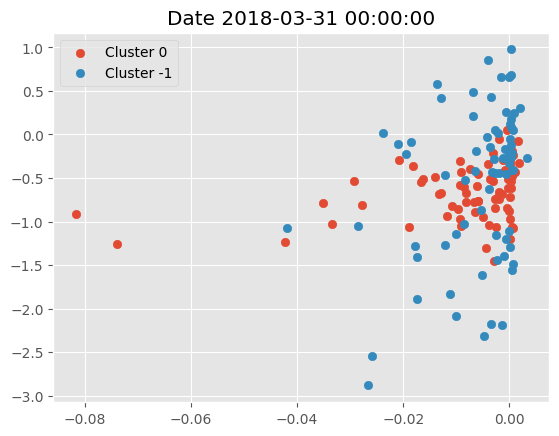

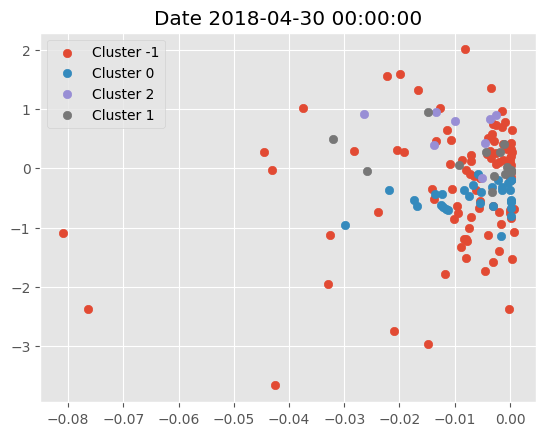

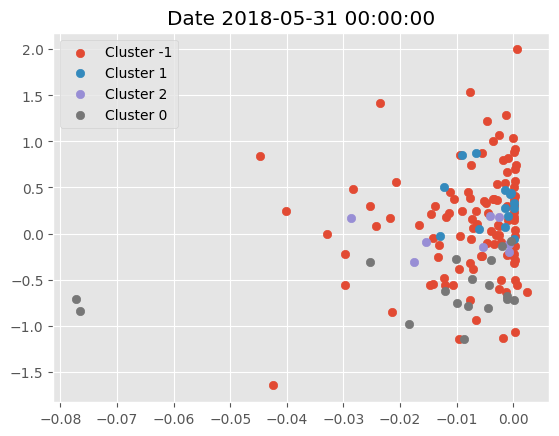

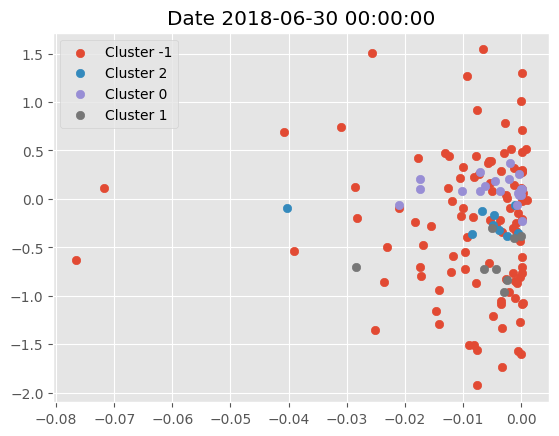

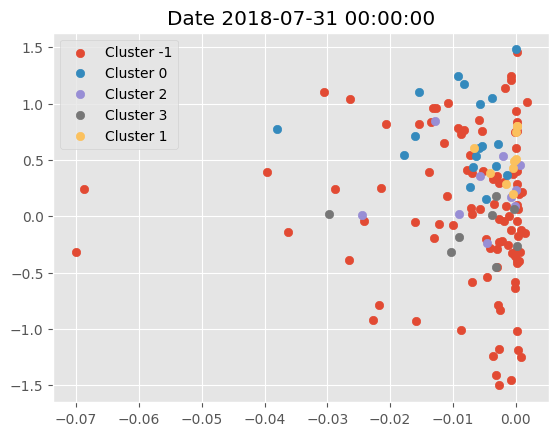

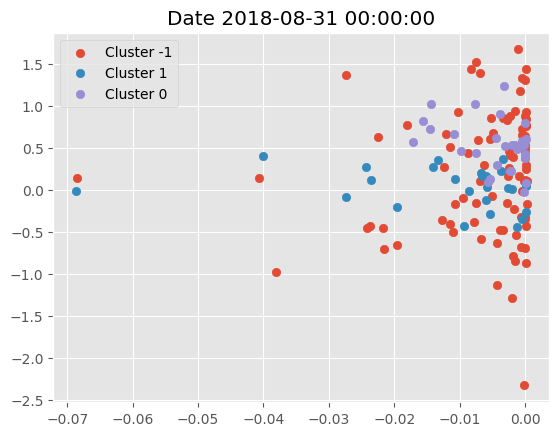

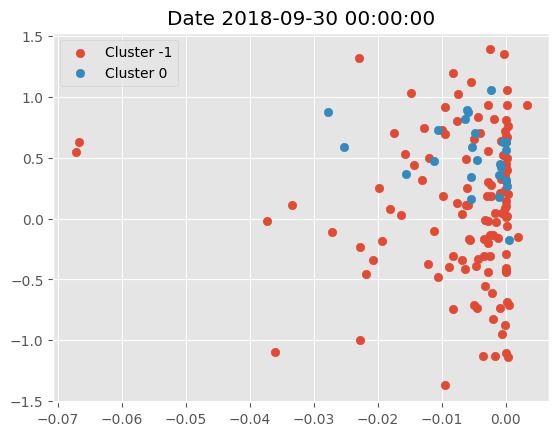

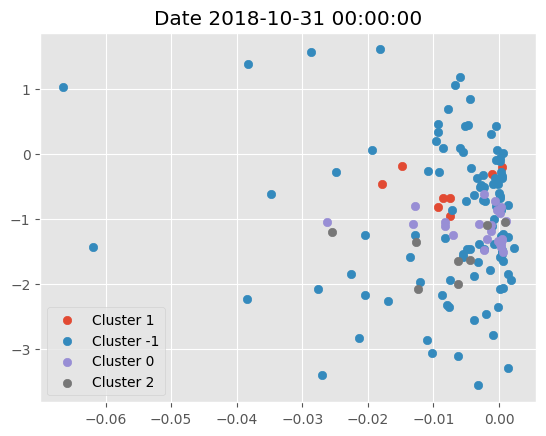

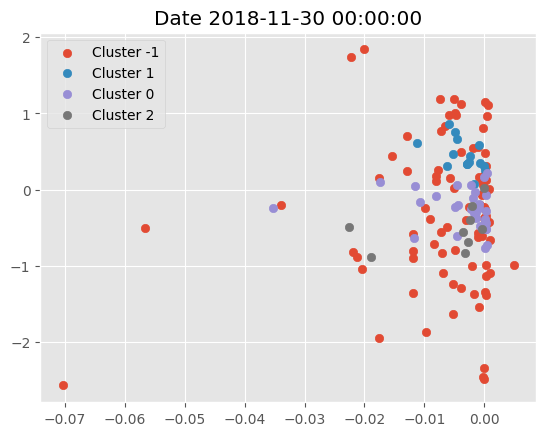

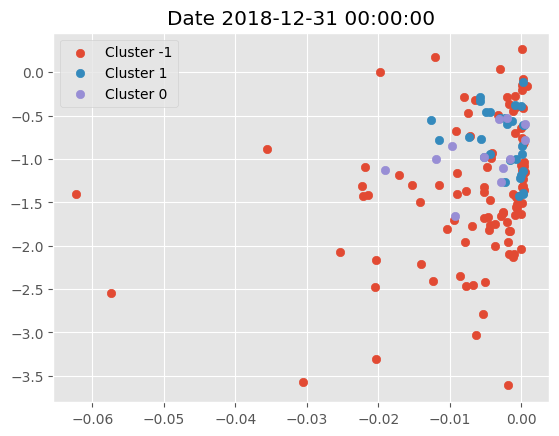

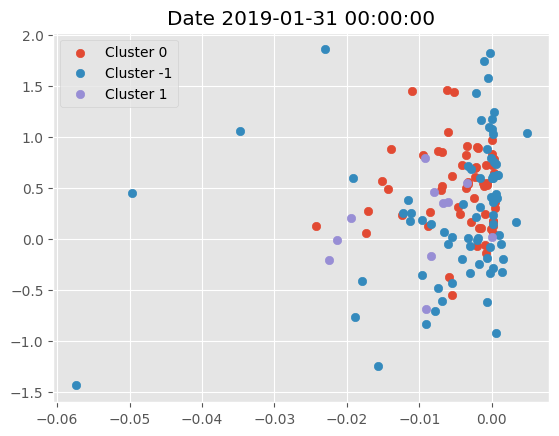

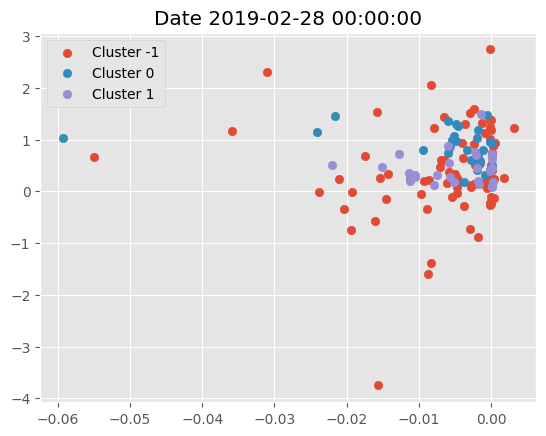

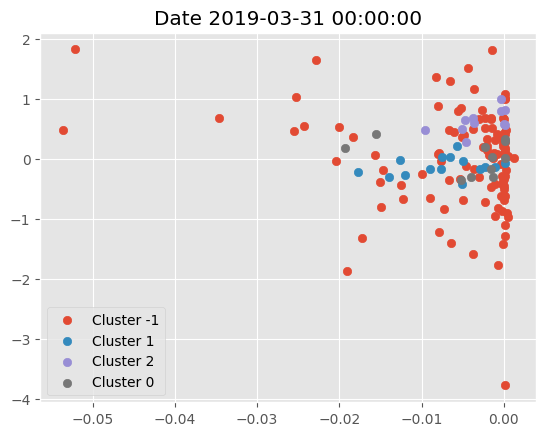

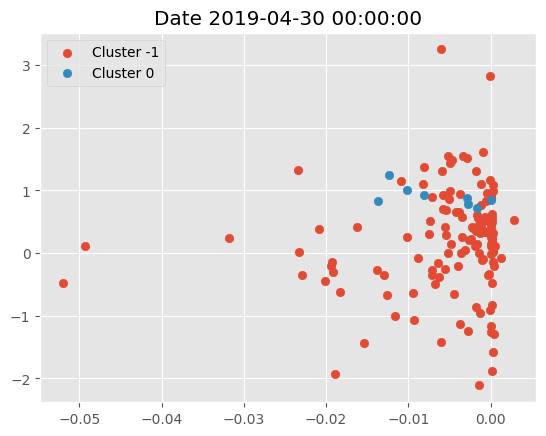

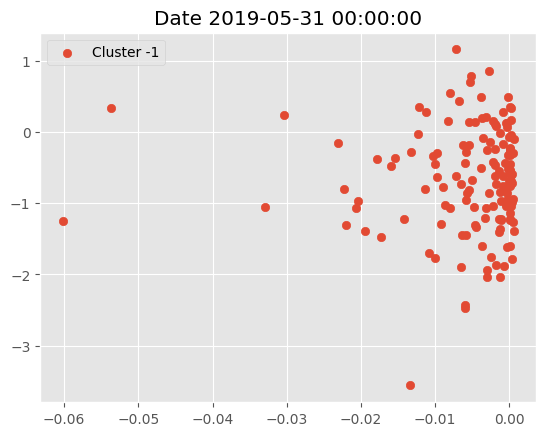

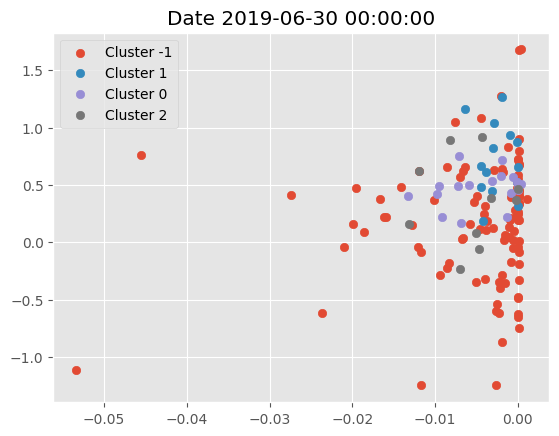

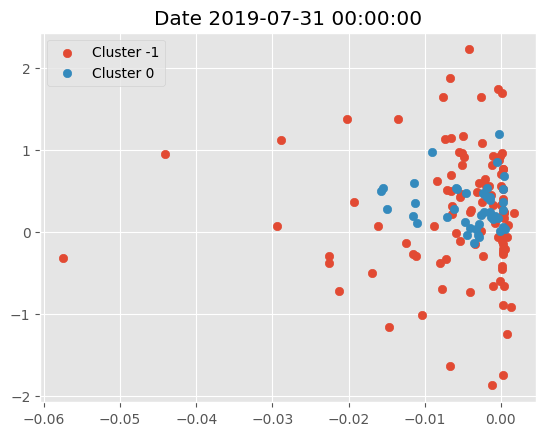

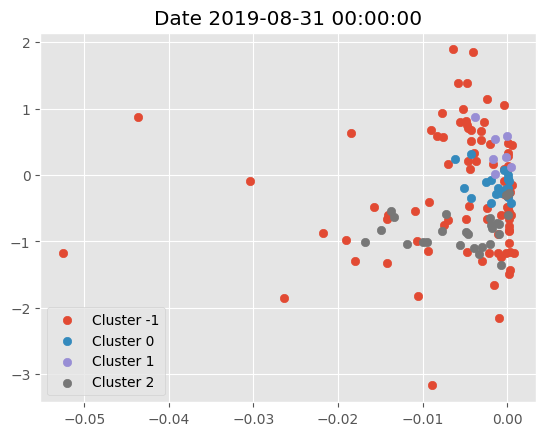

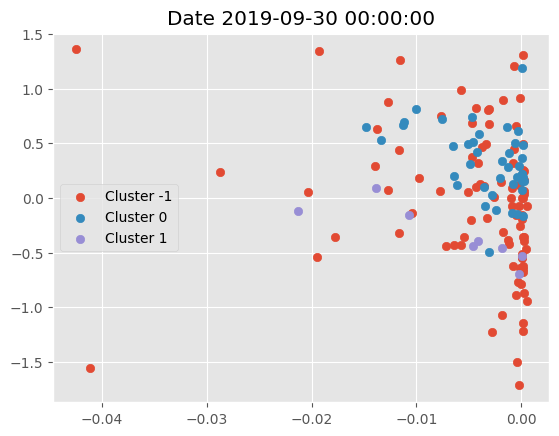

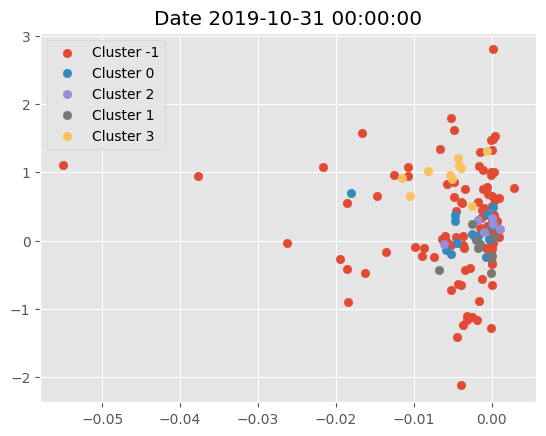

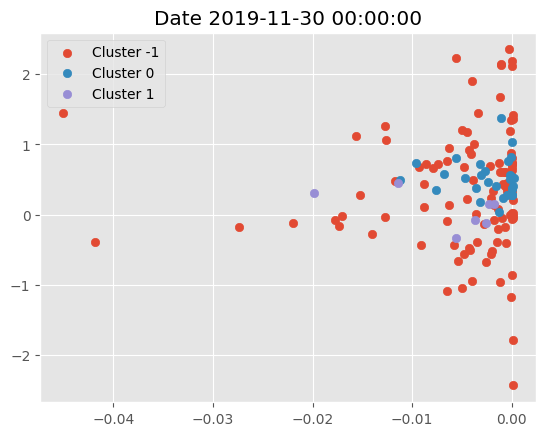

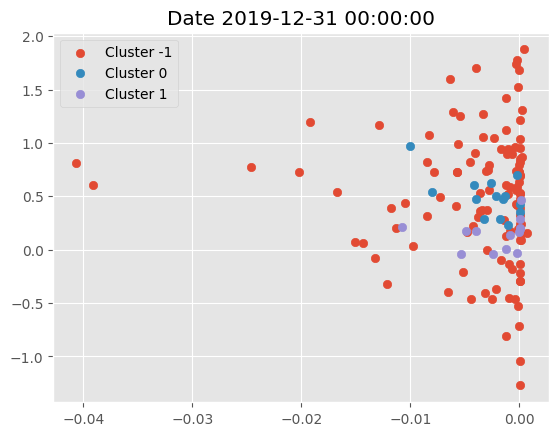

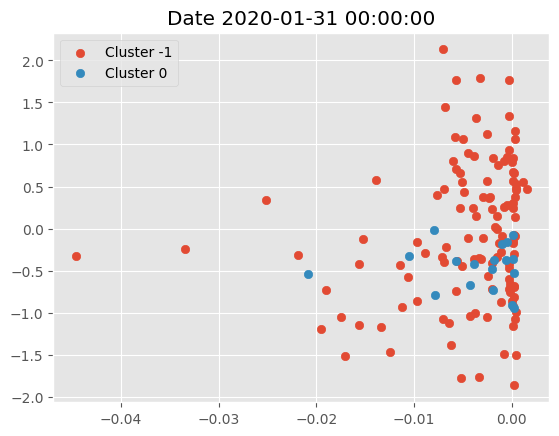

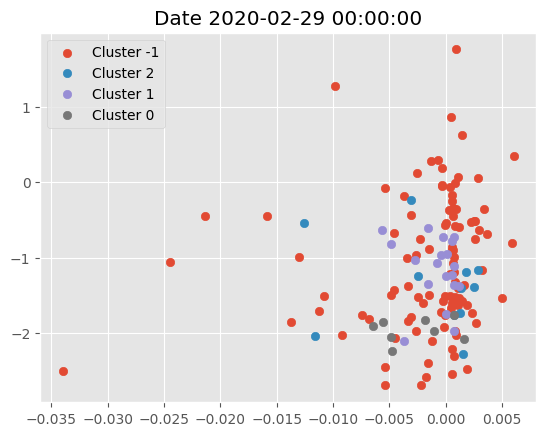

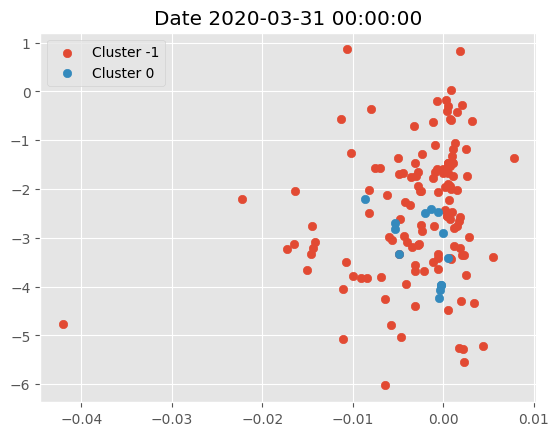

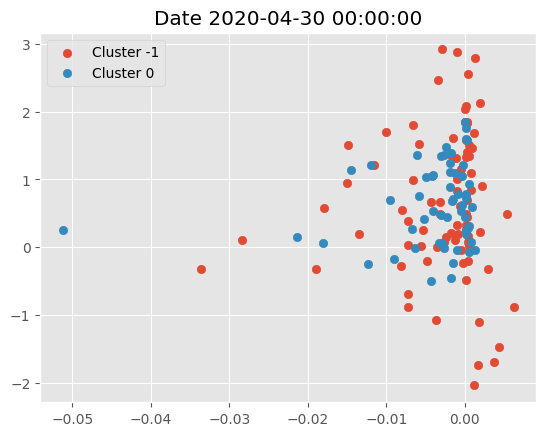

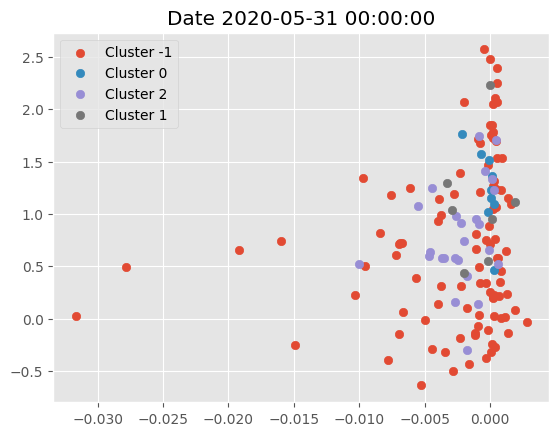

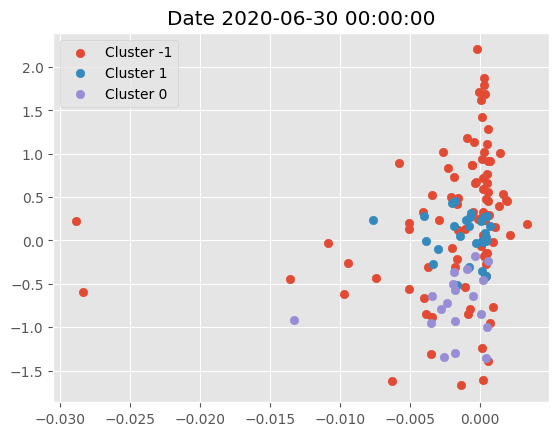

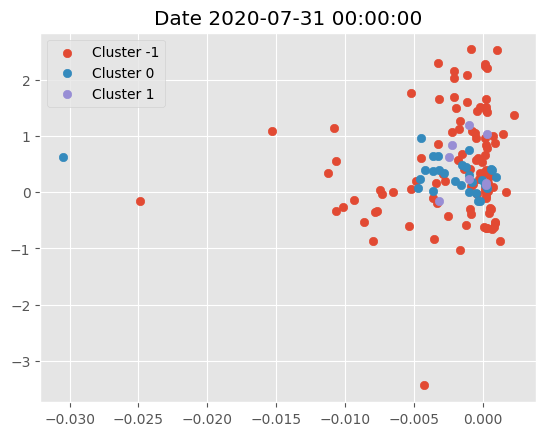

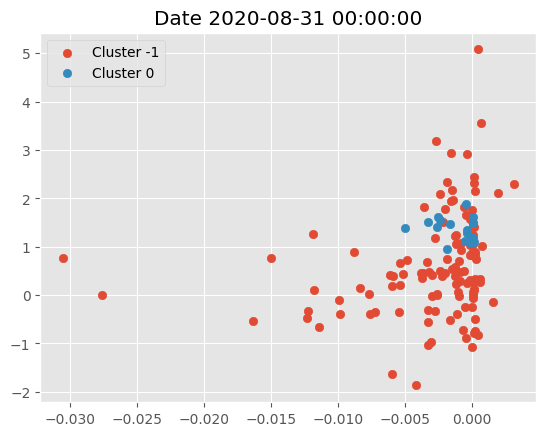

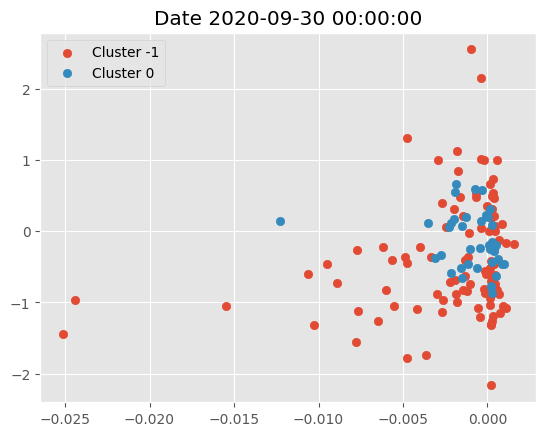

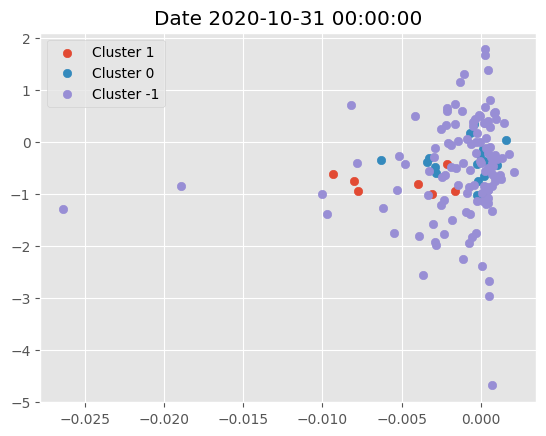

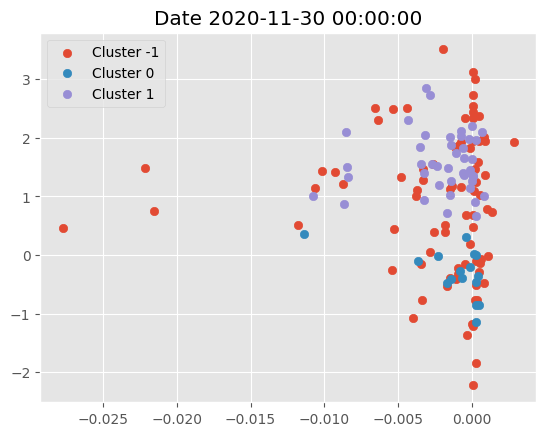

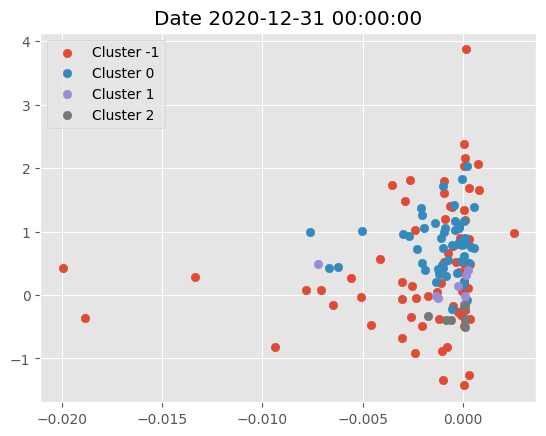

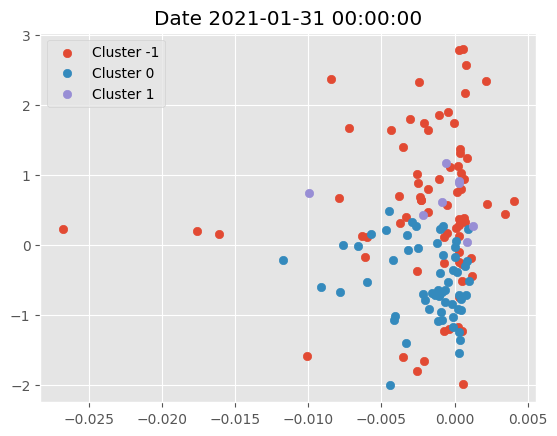

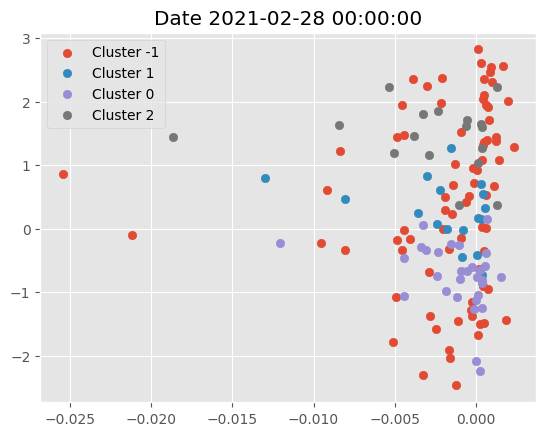

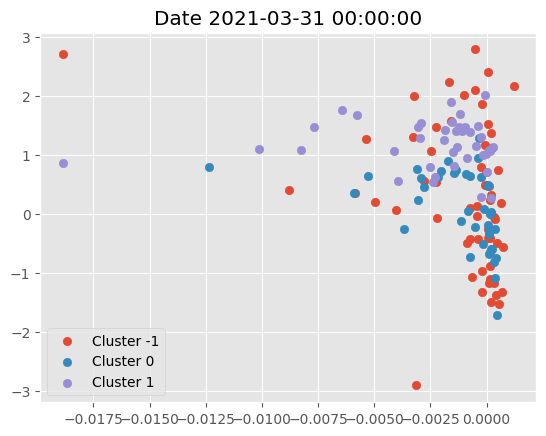

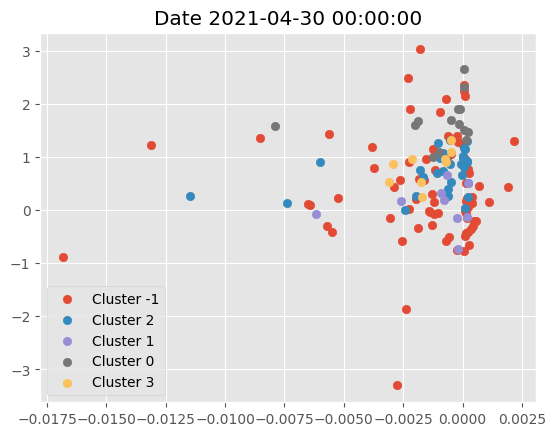

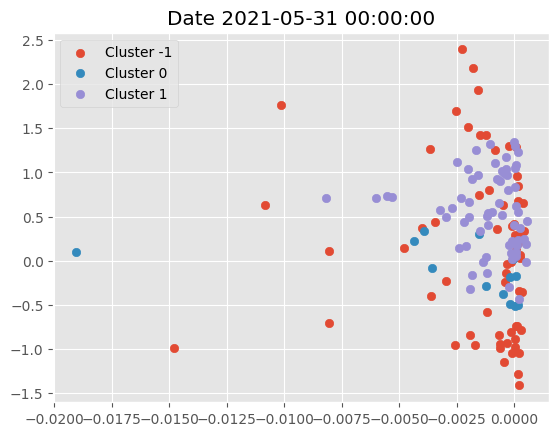

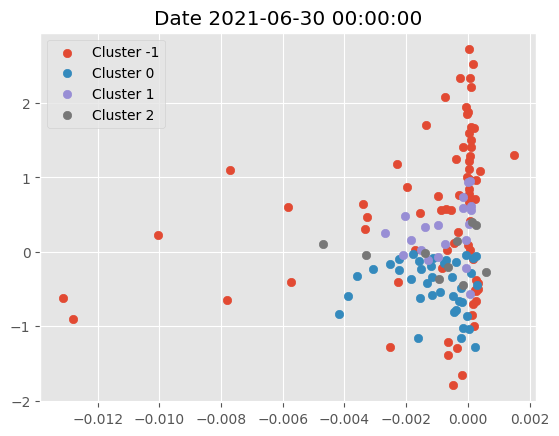

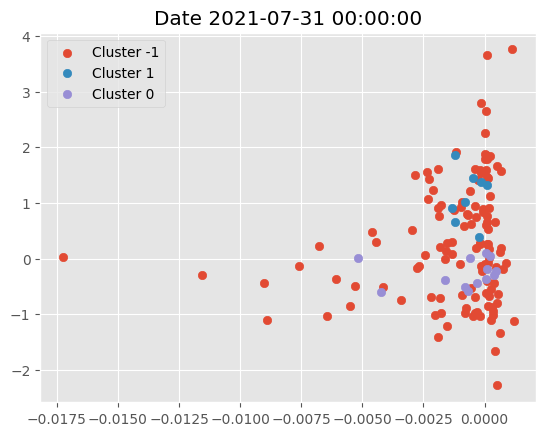

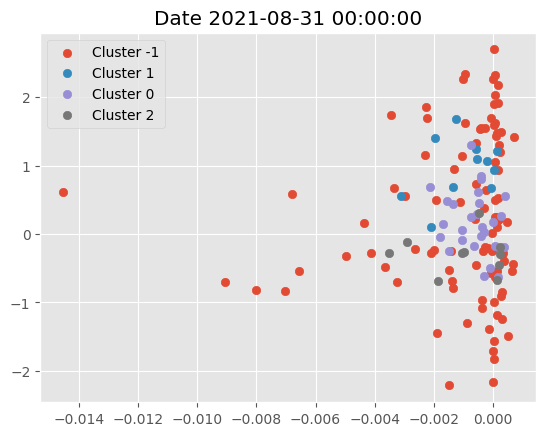

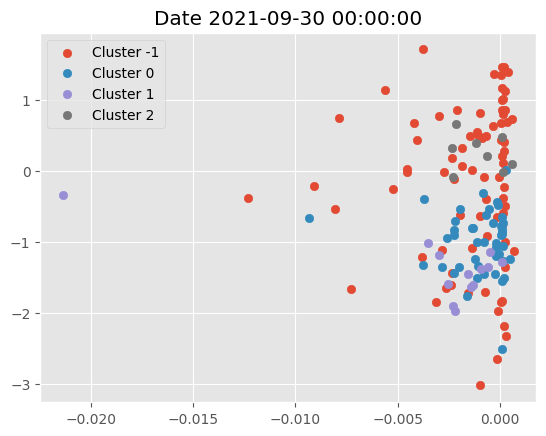

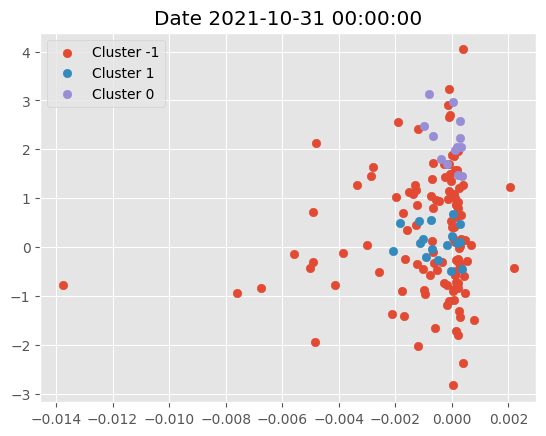

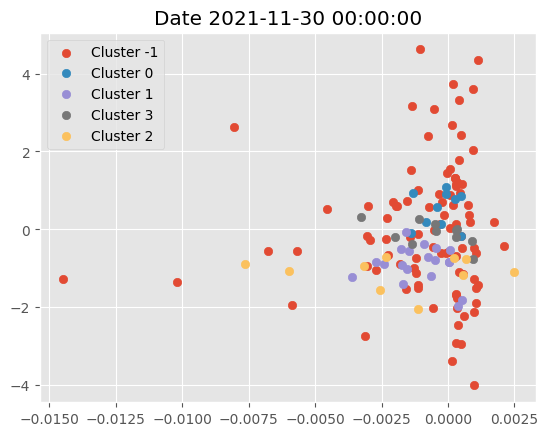

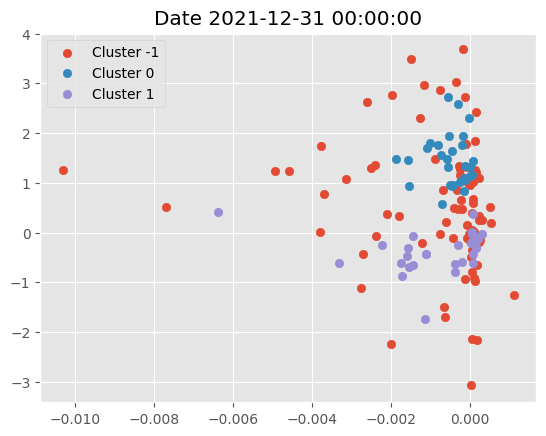

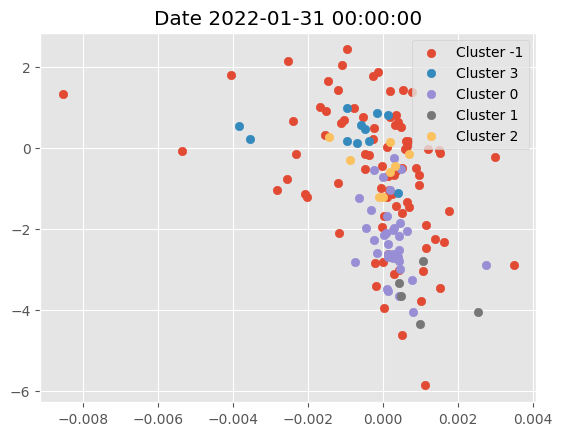

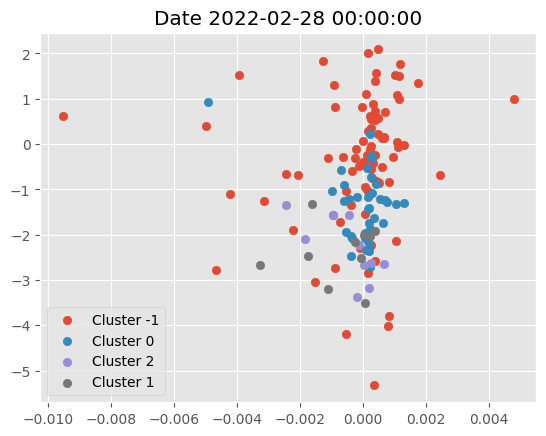

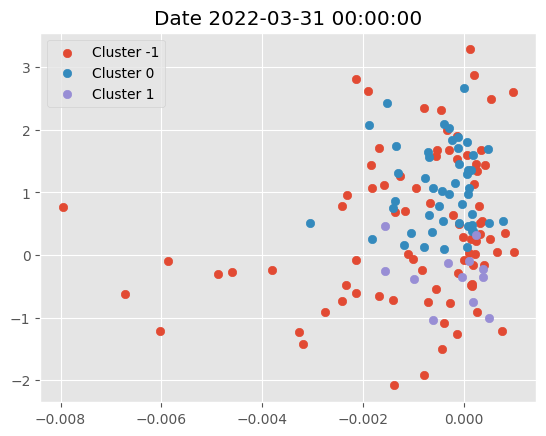

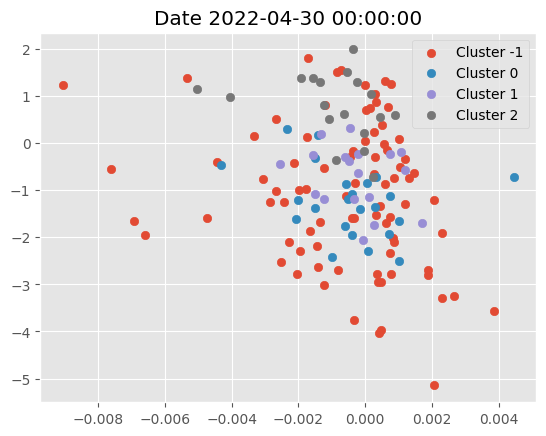

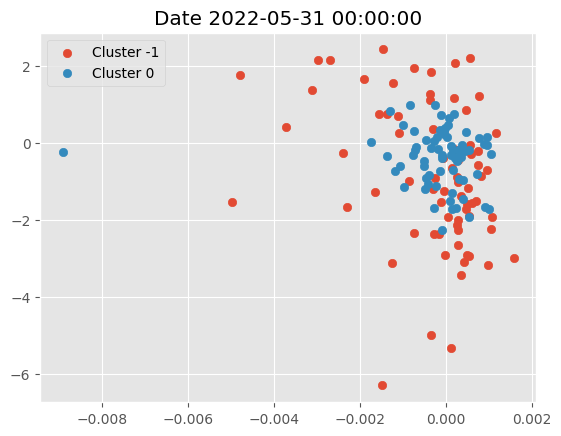

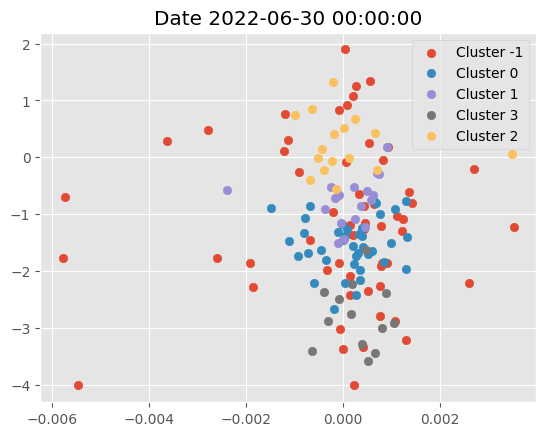

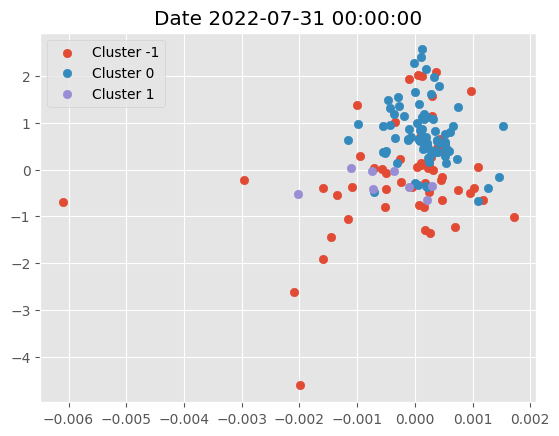

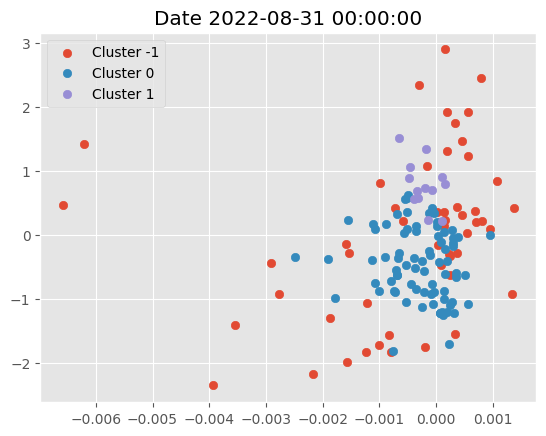

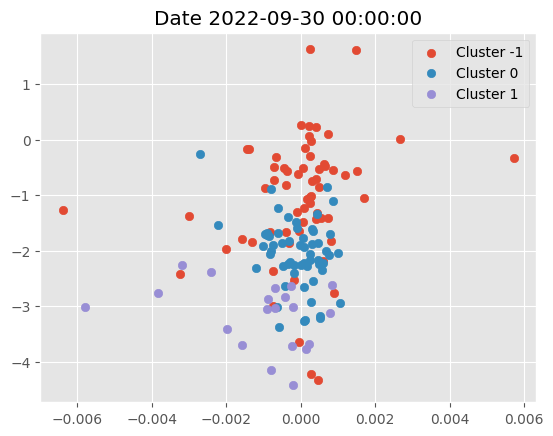

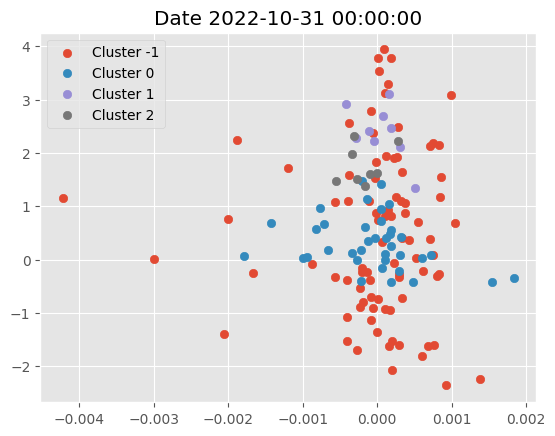

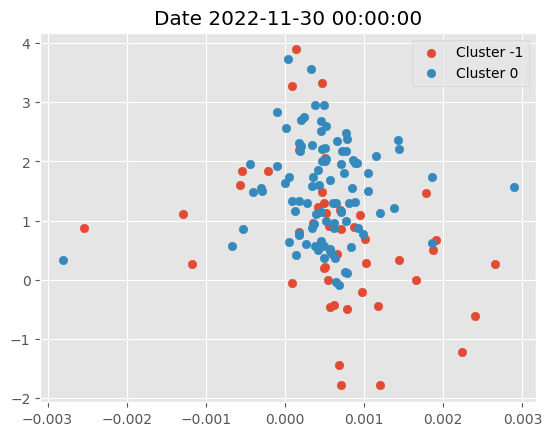

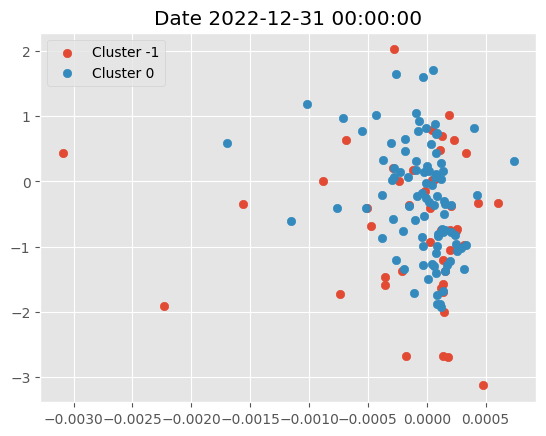

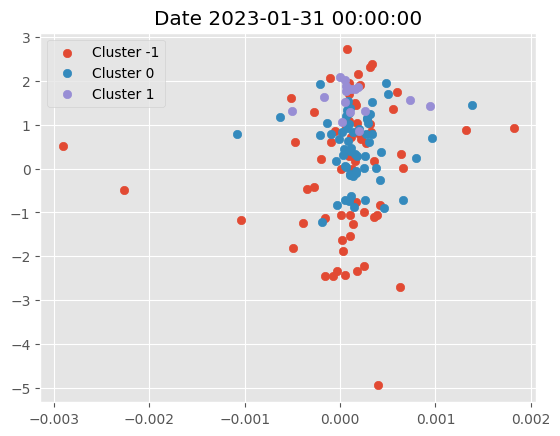

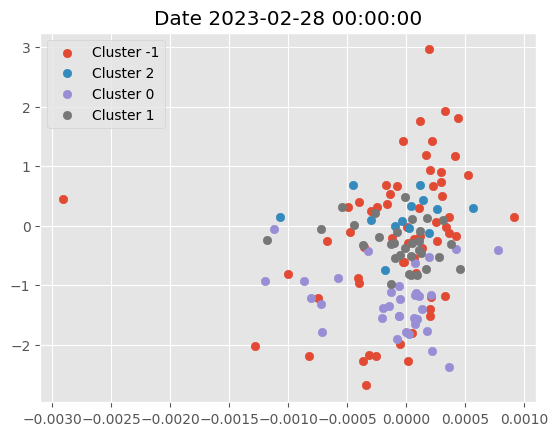

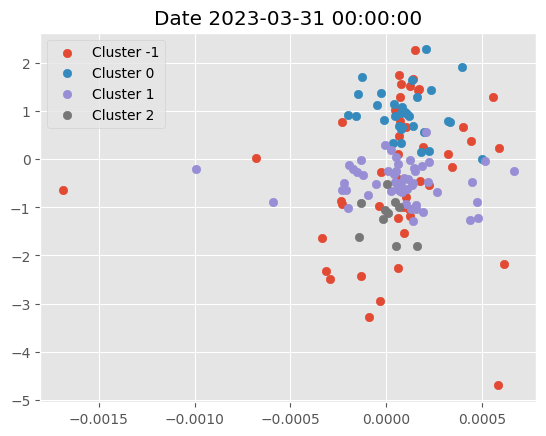

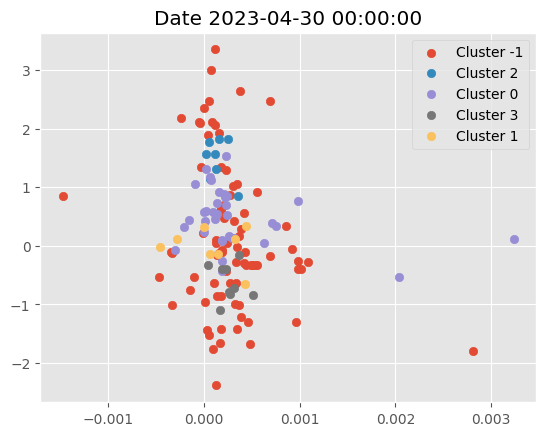

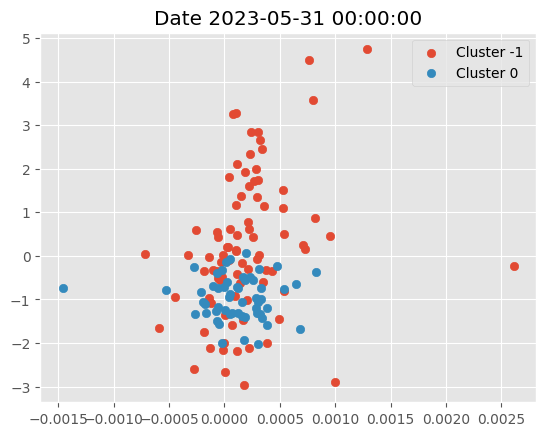

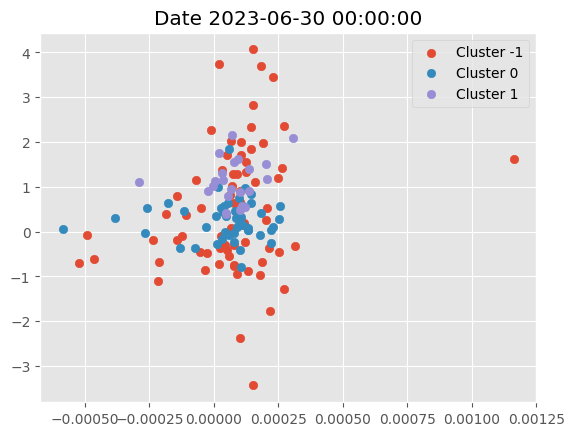

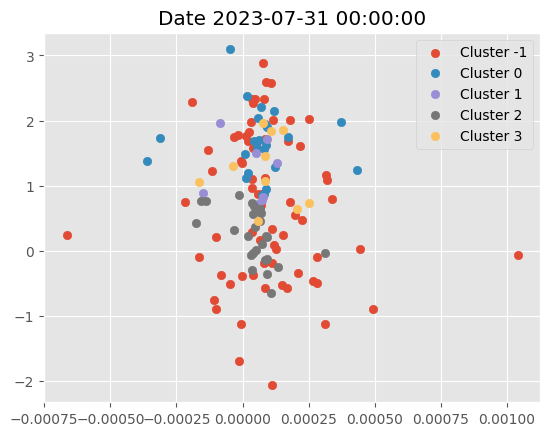

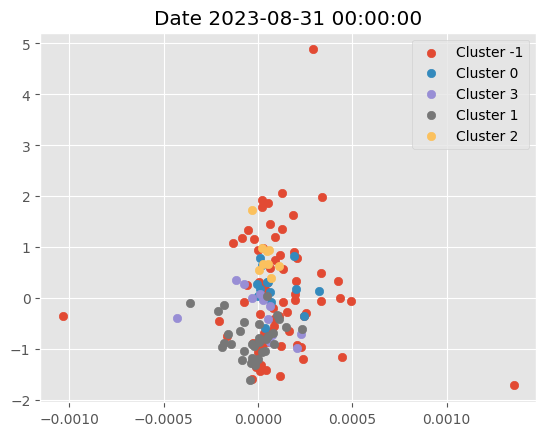

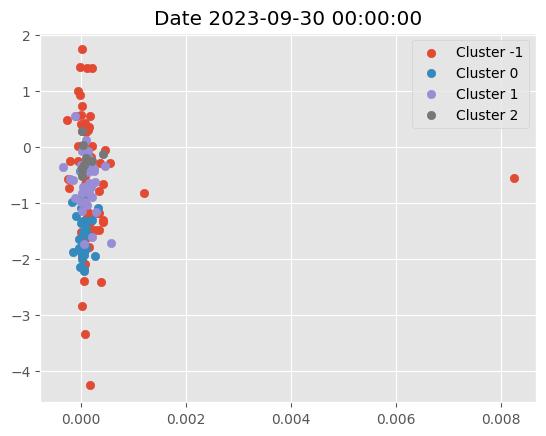

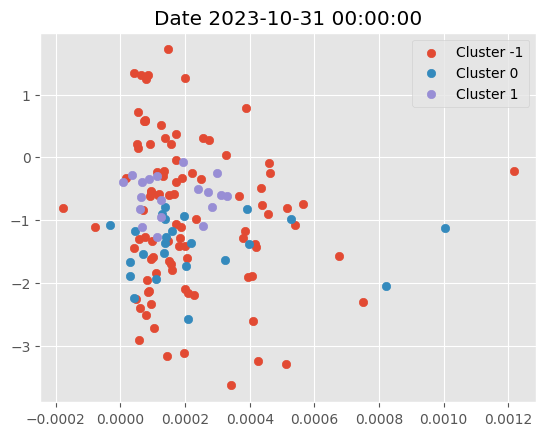

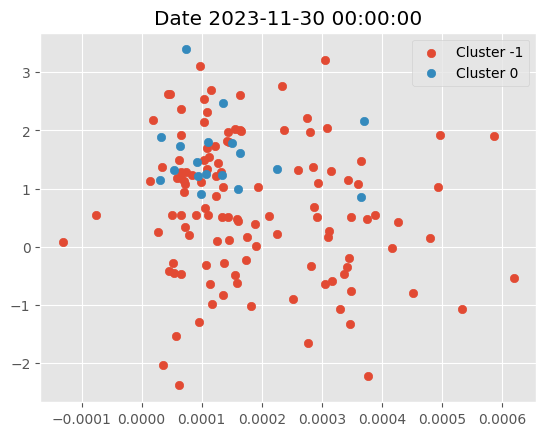

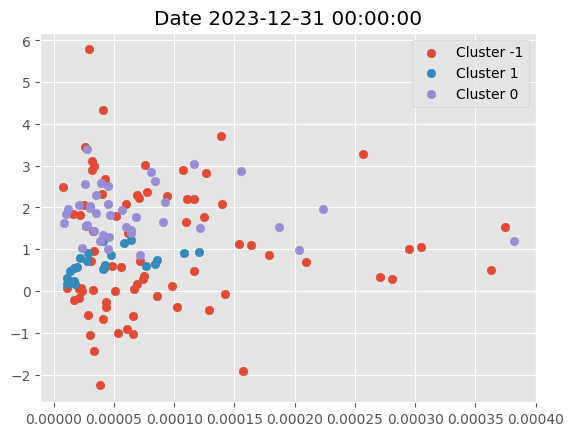

In [13]:
def plot_clusters(data):
    unique_clusters = data['cluster'].unique()

    for cluster in unique_clusters:
        cluster_data = data[data['cluster'] == cluster]
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 6], label=f'Cluster {cluster}')

    plt.legend()
    plt.show()
    return

plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i, level=0)
    plt.title(f'Date {i}')
    plot_clusters(g)

### For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization

In [14]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2016-09-01': ['AAL',
  'AAPL',
  'ADBE',
  'AMZN',
  'AVGO',
  'AXP',
  'DE',
  'DHR',
  'EA',
  'GD',
  'GM',
  'GOOG',
  'GOOGL',
  'HPQ',
  'MA',
  'MDLZ',
  'MET',
  'META',
  'MMM',
  'MPC',
  'MRK',
  'MSFT',
  'NFLX',
  'NXPI',
  'PG',
  'PXD',
  'TXN',
  'UAL',
  'UNP',
  'V',
  'YUM'],
 '2016-11-01': ['BAC',
  'C',
  'COF',
  'COP',
  'LVS',
  'META',
  'MGM',
  'MPC',
  'PANW',
  'TXN'],
 '2016-12-01': ['AAPL', 'ABBV', 'AVGO', 'COST', 'DHR', 'EA', 'MA', 'MRK'],
 '2017-06-01': ['C', 'GM', 'HPQ', 'INTC', 'KR', 'VTRS', 'VZ'],
 '2017-10-01': ['AAL',
  'AIG',
  'BAX',
  'CRM',
  'EA',
  'ELV',
  'HCA',
  'IBM',
  'MCD',
  'MCK',
  'MGM',
  'MRK',
  'RTX',
  'VRTX'],
 '2017-11-01': ['CL',
  'CMCSA',
  'DIS',
  'GD',
  'HCA',
  'KHC',
  'PEP',
  'PFE',
  'QCOM',
  'VRTX',
  'YUM'],
 '2018-08-01': ['AXP', 'COF', 'CSCO', 'MA', 'NVDA', 'TXN', 'XOM', 'YUM'],
 '2019-11-01': ['BAC',
  'CAT',
  'CVS',
  'LVS',
  'NEE',
  'PFE',
  'PNC',
  'RTX',
  'USB',
  'WFC'],
 '2021-05-01': ['AIG',


#### Define portfolio optimization function

* We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

* To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

* Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).

In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()


In [16]:
# Download Fresh Daily Prices Data only for short listed stocks

stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  170 of 170 completed


Adj Close                                                  \
                  AAL        AAPL        ABBV         ABT         ACN   
Date                                                                    
2015-02-02  46.162369   26.547651   41.911125   38.329296   73.930740   
2015-02-03  45.006416   26.552124   42.567070   38.837757   75.730980   
2015-02-04  46.863518   26.755775   39.294277   38.278442   75.231377   
2015-02-05  46.341335   26.946745   40.039974   38.685200   76.204712   
2015-02-06  45.714733   26.719828   39.287380   38.558090   75.929092   
...               ...         ...         ...         ...         ...   
2023-12-22  14.310000  193.600006  154.940002  109.029999  354.450012   
2023-12-26  14.110000  193.050003  154.619995  109.230003  353.429993   
2023-12-27  13.990000  193.149994  154.880005  109.790001  353.820007   
2023-12-28  13.980000  193.580002  154.750000  110.400002  351.589996   
2023-12-29  13.740000  192.529999  154.970001  110.070000  350.910004   

                                                                       ...  \
                  ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2015-02-02   71.110001   68.610413   54.119999  40.424812   20.290169  ...   
2015-02-03   71.919998   70.008270   54.919998  41.121807   20.813845  ...   
2015-02-04   72.279999   71.192345   56.439999  41.266006   20.964735  ...   
2015-02-05   73.099998   71.677475   56.230000  41.354130   21.266510  ...   
2015-02-06   72.540001   71.077232   57.070000  41.738670   21.515034  ...   
...                ...         ...         ...        ...         ...  ...   
2023-12-22  598.750000  230.970001  242.759995  66.930000  162.050003  ...   
2023-12-26  598.260010  232.539993  245.070007  67.129997  164.279999  ...   
2023-12-27  596.080017  231.610001  245.110001  67.150002  164.210007  ...   
2023-12-28  595.520020  232.490005  244.910004  67.870003  163.119995  ...   
2023-12-29  596.599976  232.970001  243.479996  67.750000  162.070007  ...   

             Volume                                                           \
               VRTX     VTRS        VZ       WBA      WDC       WFC      WMT   
Date                                                                           
2015-02-02  1797600  4618800  23172300   4247400  2317800  17714500  6927200   
2015-02-03  2205100  5857600  21481800   2896200  2227000  20258900  8283500   
2015-02-04  2302600  3370500  19937400   3381700  4537800  14435600  8932300   
2015-02-05  1099200  3989500  18762300   4072500  1603100  13281900  5090800   
2015-02-06  1718700  1910900  47425400   4493300  1747400  19317000  5617600   
...             ...      ...       ...       ...      ...       ...      ...   
2023-12-22   804200  6033900  13157900   9776300  2936500  10448000  6467400   
2023-12-26   531600  4043400  11856600  10181100  2010800   8856600  3893300   
2023-12-27   594000  5568500  15267600   8265500  2167200  12536700  6632000   
2023-12-28   735600  6162500  14931700   7899900  4200000   9872600  5592000   
2023-12-29   727400  6213000  16205200  10853300  3478100  11731900  7314200   

                                         
               WYNN       XOM       YUM  
Date                                     
2015-02-02  1211300  20306300   4317247  
2015-02-03  2386800  21900900   4622432  
2015-02-04  4808700  19632200   5242540  
2015-02-05  1760000  12809000  13024072  
2015-02-06  1464500  12331200   6537005  
...             ...       ...       ...  
2023-12-22  1170500  12921800    991500  
2023-12-26  1150000  16835100    627500  
2023-12-27  1142200  14558800   1050400  
2023-12-28  1233000  16329300    882500  
2023-12-29  1144800  17741400   1196800  

[2244 rows x 1020 columns]

* Calculate daily returns for each stock which could land up in our portfolio.

* Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

* If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

* Calculated each day portfolio return.

In [17]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2016-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2017-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-08-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-05-01, Continuing with Equal-Weights


,Strategy Return
date,
2016-09-01,0.002540
2016-09-02,0.004106
2016-09-06,0.006230
2016-09-07,0.001794
2016-09-08,-0.002629
...,...
2023-09-25,0.002191
2023-09-26,-0.009907
2023-09-27,-0.003798


# Part D - Testing

## Visualize Portfolio returns and compare to SP500 returns.

In [18]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


,Strategy Return,SPY Buy&Hold
2016-09-01,0.002540,0.000046
2016-09-02,0.004106,0.004498
2016-09-06,0.006230,0.003018
2016-09-07,0.001794,-0.000092
2016-09-08,-0.002629,-0.002285
...,...,...
2023-09-25,0.002191,0.004196
2023-09-26,-0.009907,-0.014800
2023-09-27,-0.003798,0.000399
2023-09-28,0.006207,0.005781


# Part E - Evaluate results

As the graph down below demonstrate, in which the returns of the 'SPY' ticker is compared to DBSCAN model trading strategy vs the S&P 500 returns. It is clear that the overall performance of the DBSCAN model is much promising resulting higher returns by significant amounts.

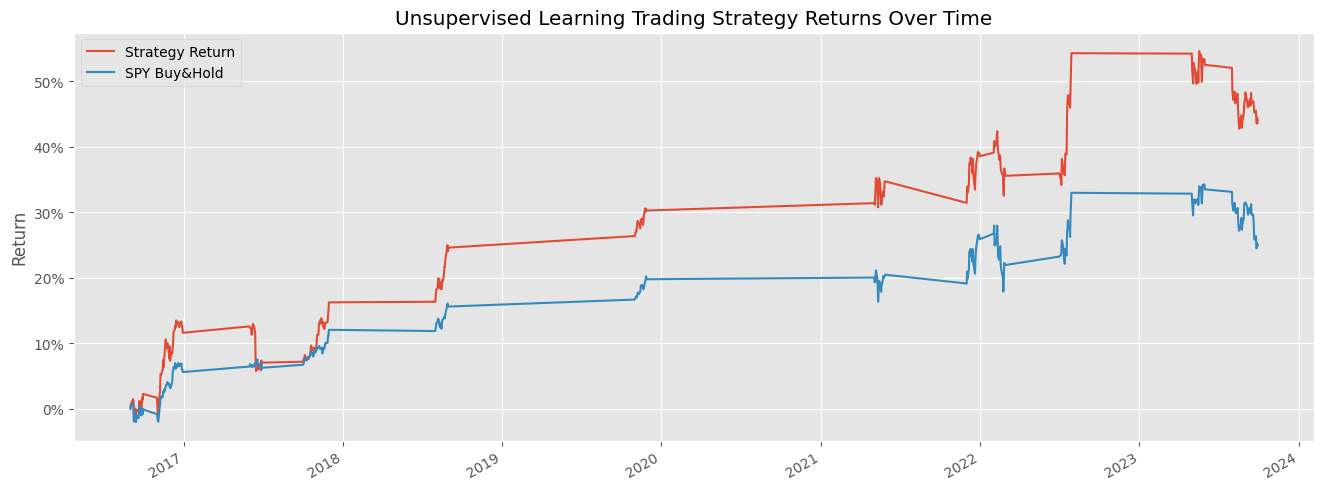

In [19]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()
